<a href="https://colab.research.google.com/github/oleksandrakravtsova/fe-epam/blob/master/Copy_of_%D0%9A%D1%83%D1%80%D1%81_%D0%B7_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%9D%D0%B0%D0%B2%D1%87%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Підготовка до роботи з Гугл Диском (запускати перед кожним сеансом навчання)

In [ ]:
#Під'єднуємось до гугл диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Блок 1: вступ у машинне навчання

##Урок 1: дерево прийняття рішень (decision tree)


(20 хв) Вашa двоюрідна сестра заробила мільйони доларів спекулюючи на нерухомості. Вона запропонувала вам стати діловим партнером через ваш інтерес до науки про дані: вона заплатить вам гроші, а ви створите модель, яка передбачає, скільки вартують різні будинки.

Ви запитуєте: як вона прогнозувала вартість нерухомості в минулому, а вона відповідає, що це просто інтуїція. Але ваші додаткові питання виявляють, що вона визначала цінові закономірності будинків, які бачила у минулому, і використовує ці знання для прогнозування вартості нових будинків, які розглядає.

Машинне навчання працює схожим чином. Ми почнемо з моделі, яка називається ***деревом прийняття рішень***. Є звісно вигадливіші моделі, які дають точніші прогнози. Але дерева прийняття рішень легко зрозуміти, і вони є базовим елементом для кращих моделей в науці про дані.

Для простоти ми почнемо з максимально елементарного дерева.** Глибина дерева** - це міра того, скільки **сплітів** (*розгалужень*) модель робить перед тим, як дійти до прогнозу




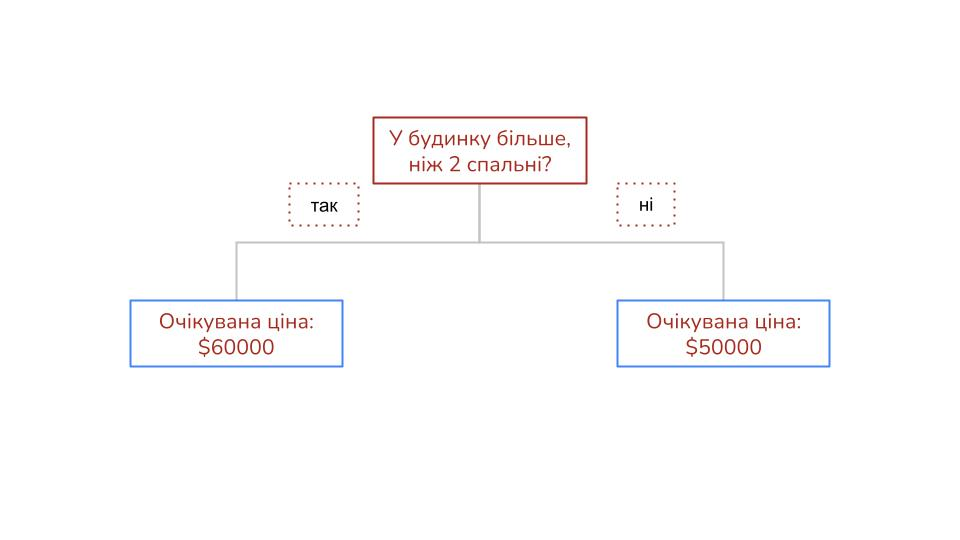

(10 хв) Ця модель ділить будинки лише на дві категорії. Прогнозована ціна на будь-який будинок, що розглядається, є середньою історичною ціною будинків тієї самої категорії.

Ми використовуємо дані, щоб вирішити, ЯК розбити будинки на дві групи, а потім знову визначити прогнозовану ціну в кожній групі. Цей етап фіксації шаблонів з даних називається пристосуванням або ***навчанням моделі***. Дані, що використовуються для ***підгонки моделі***, називаються ***навчальними даними***.

Після того, як модель пристосована (підігнана), ви можете застосувати її до нових даних, щоб передбачити ціни на інші будинки.

**Покращуючи модель**

(10 хв) Найбільшим недоліком минулої моделі є те, що вона не враховує більшість факторів, що впливають на ціну будинку, таких як кількість ванних кімнат, розмір ділянки, розташування, тощо.

Ви можете взяти до уваги більше факторів, використовуючи дерево, яке має більше "розбиттів" -- **сплітів**. Вони називаються "*глибшими*" деревами. Дерево рішень, яке також враховує площу кожного будинку, може виглядати так:

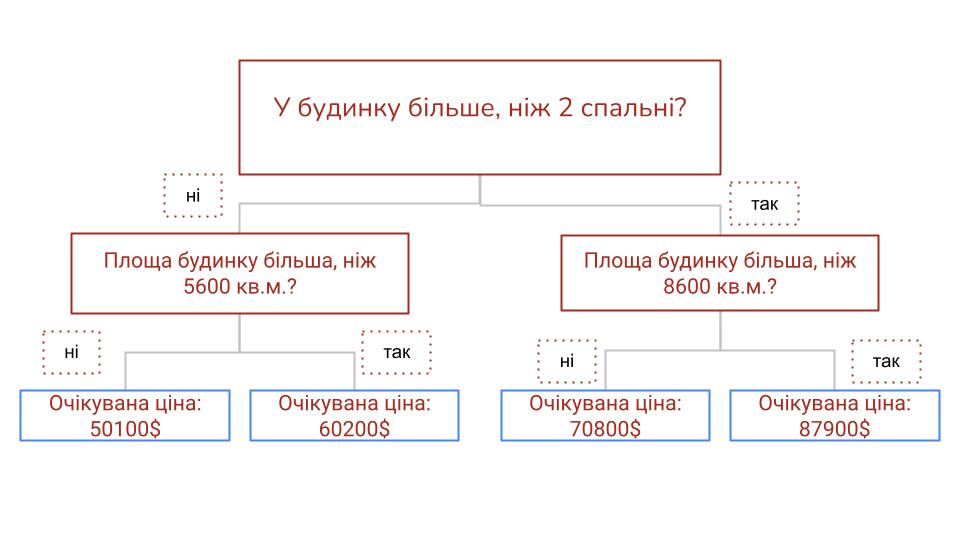

Ви прогнозуєте ціну будь-якого будинку, завжди вибираючи шлях, що відповідає характеристикам цього будинку. Прогнозована ціна на будинок знаходиться внизу дерева. Пункти в останньому рядку, де ми робимо прогноз, називаються **листками**.

###Досліджуючи ваші дані (бібліотекою Pandas)

(40 хв) Першим кроком у будь-якому проекті машинного навчання є ознайомлення з даними. Для цього ви будете використовувати бібліотеку Pandas. Pandas - основний інструмент даних, який вчені використовують для вивчення та обробки даних. Більшість людей посилаються на Pandas у своєму коді як pd. Ми це робимо командою

In [ ]:
import pandas as pd

Найважливішою частиною бібліотеки Pandas є DataFrame. DataFrame містить тип даних, який ви можете сприймати як таблицю. Це схоже на аркуш у Excel або таблицю в базі даних SQL.

Pandas має потужні методи для більшості речей, які ви хочете зробити з даними цього типу.



Перед тим, як працювати з данними, їх потрібно спочатку завантажити. Для цього,

1) Завантажте файл на свій гугл диск

2) Отримайте його шлях на гугл диску (приклад буде у коді нижче)

Для цього курсу ми будемо використовувати набір даних (aka ***dataset***) характеристик будинків Мельбурну за посиланням https://drive.google.com/file/d/1BaQexn8PONGMUBWBnY6qi6PqXX-rpxV5/view?usp=sharing

In [ ]:
#Під'єднуємось до гугл диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# шлях до датасету з даними про будинки Мельбурну
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'

# Створіть об'єкт, який міститиме в собі наш датасет
melbourne_data = pd.read_csv(melbourne_file_path) 

Маючи готовий до маніпуляцій датасет, тепер ми можемо його описати функцією `.describe()`

In [ ]:
melbourne_data.describe() #На виході отримуємо базові статистині дані:

#count - к-сть даних
#mean - середнє арифметичне
#std - стандартне відхилення

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Щоб переглянути перші 5 об'єктів, використайте функцію head(). Хоча дефолт є 5, ви можете змінити це значення, ввівши нове у дужки

In [ ]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
melbourne_data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


Для того, щоб отримати окрему колонку, просто уточніть її після точки

In [ ]:
melbourne_data.Rooms

0        2
1        2
2        3
3        3
4        4
        ..
13575    4
13576    3
13577    3
13578    4
13579    4
Name: Rooms, Length: 13580, dtype: int64

##Урок 2: ваша перша модель Машинного Навчання

(15 хв) У нашому наборі даних було занадто багато змінних, щоб красиво їх описати. Як звести цей величезний обсяг даних до чогось, що можна осягнути?

Щоб вибрати змінні / стовпці, нам потрібно буде переглянути список усіх стовпців у наборі даних. Це робиться із функцією `columns` DataFrame (нижній рядок коду нижче).

In [ ]:
import pandas as pd

# шлях до датасету з даними про будинки Мельбурну
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'

# Створіть об'єкт, який міститиме в собі наш датасет
melbourne_data = pd.read_csv(melbourne_file_path) 

######################
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# Дані будинків Мельбурну містять пусті комірки (деякі змінні деяких характеристик будинків не були записані)
# Ми навчимося як працювати з опущеними даними згодом 
# А поки, щоб уникнути труднощів, ми не враховуватимемо ВСІ будинки, у яких є пропущені змінні

melbourne_data = melbourne_data.dropna(axis=0)

(30 хв) **Вибір цілі для прогнозування**

Основна ціль машинного навчання -- це маючи вхідний набір даних видати результат-прогноз, який модель визначила після ряду "навчань".

Для тренування нам треба два набори даних: **параметри** та **ціль для прогнозування**. У нашому випадку параметрами будуть "кімнати, рік будування, широта, тощо...", а ціллю для прогнозування -- власне вартість будинку.

Ми будемо використовувати *крапкове позначення*, щоб вибрати стовпець, який ми хочемо передбачити (*ціль для прогнозування*). Прийнято позначати ціль прогнозування змінною **y**.

Отже, кодом, який нам потрібен для збереження цін на житло в даних Мельбурна, буде

In [ ]:
y = melbourne_data.Price

**Вибір параметрів**

Стовпці, які вводяться в нашу модель (і згодом використовуються для прогнозування), називаються "**параметрами**". У нашому випадку, це стовпці, що використовуються для визначення ціни на житло. Іноді ви будете використовувати всі стовпці, крім цілі, як параметри. А іншим разом вам буде раціональніше працювати з меншою кількістю параметрів.

Наразі ми створимо модель із лише кількома функціями.

Ми обираємо кілька функцій, надаючи список назв стовпців у дужках. Кожен елемент у цьому списку повинен бути елементом типу string (тобто з лапками).

Ось приклад:

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

Прийнято параметри позначати через **Х**

In [ ]:
X = melbourne_data[melbourne_features]

Давайте глянемо на наші параметри!

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


**Будуючи першу модель**

Ви будете використовувати бібліотеку `scikit-learn` для створення своїх моделей. Під час кодування ця бібліотека записується як `sklearn`, як ви побачите у зразку коду. `Scikit-learn` - це найпопулярніша бібліотека для моделювання типів даних, які зазвичай зберігаються в `DataFrames`.

Етапи побудови та використання моделі:

* Визначте: якого типу це буде модель? Дерево рішень? Якийсь інший тип моделі? Вказуються також деякі інші параметри типу моделі.
* Підженіть: створіть шаблони із наданих даних. Це серце моделювання.
* Спрогнозуйте: що ж... нічого додати
* Оцініть: Визначте, наскільки точні прогнози вашої моделі.


Ось приклад визначення моделі дерева рішень за допомогою scikit-learn та узгодження її з параметрами та цільовою змінною.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Визначте модуль. Уточніть число для random_statе, щоб гарантувати однакові результати кожен раз, коли проганятимите код
melbourne_model = DecisionTreeRegressor(random_state=1)

# Підженіть модель!
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

Тепер у нас є модель, яку ми можемо використовувати для прогнозування.

На практиці вам потрібно буде робити прогнози щодо нових будинків, що виходять на ринок, а не будинків, на які ми вже маємо ціни. Але ми зробимо прогнози для перших декількох рядків навчальних даних, щоб побачити, як працює функція передбачення `.predict()`

In [ ]:
print("Робимо прогнозм для наступних 5 будинків:")
print(X.head())
print("передбачення їхніх цін є такими:")
print(melbourne_model.predict(X.head()))

Робимо прогнозм для наступних 5 будинків:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
передбачення їхніх цін є такими:
[1035000. 1465000. 1600000. 1876000. 1636000.]


##Урок 3: перевірка моделі

(30 хвилин) Ви створили модель. Але наскільки вона якісна?

На цьому уроці ви навчитеся використовувати *перевірку моделі* для вимірювання її якості. Вимірювання якості моделі є ключем до послідовного вдосконалення ваших моделей.


**Що таке перевірка моделі**

У майбутньому вам буде потрібно оцінити майже кожну модель, яку ви коли-небудь створите. У більшості (хоча і не у всіх) випадках відповідним показником якості моделі є *точність прогнозування*. Іншими словами, чи будуть прогнози моделі наближеними до того, що насправді відбувається.

Багато людей роблять величезну помилку, вимірюючи точність прогнозування. Вони роблять прогнози зі своїми `навчальними даними` та порівнюють ці прогнози з `цільовими значеннями` в навчальних даних. Скоро ви відчуєте проблему з цим підходом і як її вирішити за мить, але давайте подумаємо, як би було правильно зробити передусім:

Спочатку потрібно підсумувати якість моделі зрозумілим чином. Якщо порівняти прогнозовані та фактичні значення для 10000 будинків, ви, ймовірно, знайдете суміш хороших і поганих прогнозів. Переглядати список із 10000 прогнозованих та фактичних значень було б не дуже корисно. Нам потрібно узагальнити це в єдину метрику.

Існує багато метрик для підведення підсумків якості моделі, але ми почнемо з такої, яка називається Середня абсолютна похибка -- Mean Absolute Error (також звана як `MAE`). Давайте розберемо цю метрику, починаючи з останнього слова, *похибка*.

Похибка передбачення для кожного будинку:

`похибка = реальне - передбачене`

Отже, якщо будинок коштував 150 000 доларів, і ви передбачали, що він коштуватиме 100 000 доларів, похибка становить 50 000 доларів.

За допомогою метрики MAE ми приймаємо значення по модулю кожної похибки. Це перетворює кожну похибку в додатне число. Потім беремо середнє значення цих абсолютних помилок. Це наш показник якості моделі. Простою українською мовою це можна сказати як:

|`У середньому наші прогнози відхиляються приблизно на X.`

Для розрахунку MAE нам спочатку потрібна модель. Вона вбудована в комірку внизу, яку ви можете запустити нижче:

(30 хв)**весь код з минулого заняття**

In [ ]:
import pandas as pd

# посилання до датасету з даними про будинки Мельбурну
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'

# Створіть об'єкт, який міститиме в собі наш датасет
melbourne_data = pd.read_csv(melbourne_file_path) 

######################
melbourne_data.columns

# Дані будинків Мельбурну містять пусті комірки (деякі змінні деяких характеристик будинків не були записані)
# Ми навчимося як працювати з опущеними даними згодом 
# А поки, щоб уникнути труднощів, ми не враховуватимемо ВСІ будинки, у яких є пропущені змінні

melbourne_data = melbourne_data.dropna(axis=0)

y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
from sklearn.tree import DecisionTreeRegressor

# Визначте модуль. Уточніть число для random_statе, щоб гарантувати однакові результати кожен раз, коли проганятимите код
melbourne_model = DecisionTreeRegressor(random_state=1)

# Підженіть модель!
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

Тепер: обчислюємо МАЕ!


In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

(20 хв)**Проблема з оцінками "в межах вибірки"**

Значення, яке ми щойно обчислили, можна назвати оцінкою "у вибірці". Ми використовували ту саму "вибірку" будинків що для побудови моделі, що для її оцінки. Ось чому це не корисно:

Уявіть, що на великому ринку нерухомості колір дверей не пов’язаний із ціною житла.

Однак у зразку даних, який ви використовували для побудови моделі, всі будинки із зеленими дверима були дуже дорогими. Завдання моделі полягає у пошуку моделей, які передбачають ціни на житло, тому вона побачить цю закономірність і завжди буде прогнозувати високі ціни на будинки із зеленими дверима.

Оскільки ця закономірність була отримана з навчальних даних, модель буде виглядати точною у межах навчальних даних.

Але якщо цей шаблон не виконується, коли модель бачить нові дані, модель буде дуже неточною при використанні на практиці.

Практична цінність моделей полягає саме в прогнозуванні нових даних.Найпростіший спосіб зробити це - виключити деякі дані з процесу побудови моделі, а потім використовувати їх для перевірки точності моделі на даних, яких вона раніше не бачила. Ці дані називаються ***даними перевірки.***

**Час програмувати!**

Бібліотека `scikit-learn` має функцію `train_test_split` спеціально розроблену для розбиття даних на дві частини. Ми будемо використовувати деякі з цих даних як *навчальні дані*, для моделі, а інші дані будемо використовувати як *дані перевірки* для обчислення *середньої абсолютної похибки.*

Ось код:

In [ ]:
from sklearn.model_selection import train_test_split

# Тут ми розіб'ємо дані на навчальні та перевірочні: що для X та y
# Розбиття (далі: спліт) базується на основі генератора випадкових чисел.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Визнач нову модель:
melbourne_model = DecisionTreeRegressor()
# Піджени її
melbourne_model.fit(train_X, train_y)

# отримай прогнозовані результати на основі перевірочних даних (val_X, val_y) - від англійського слова "validation"
val_predictions = melbourne_model.predict(val_X)

#оціни похибку!
print("Середня похибка складає:")
print(mean_absolute_error(val_y, val_predictions))

Середня похибка складає:
277878.0512158382


##Урок 4: Переоснащення та недооснащення

(30 хв) Тепер, коли у вас є надійний спосіб вимірювання точності моделі, ви можете поекспериментувати з альтернативними моделями і подивитися, яка дає найкращі прогнози. Але які альтернативи у вас є для моделей?

Ви можете побачити в документації `scikit-learn`, що модель дерева рішень має безліч параметрів. Найважливіший з них -- це параметр, що визначає глибину дерева. Пригадайте з першого уроку в цьому курсі, що глибина дерева - це міра того, скільки сплітів воно робить перед тим, як дійти до прогнозу. Тоді це було відносно неглибоке дерево (2 рівні)

По мірі того, як дерево стає глибшим, набір даних ділиться на листя з меншою кількістю будинків. Якщо дерево мало лише 1 поділ, воно ділить дані на 2 групи. Якщо кожну групу розділити знову, ми отримаємо 4 групи будинків. Поділ кожного з них знову створить 8 груп. Якщо ми будемо продовжувати подвоювати кількість груп, додаючи більше поділів на кожному рівні, ми матимемо 2^10 груп будинків до того моменту, коли ми дійдемо до 10-го рівня. Це 1024 листки.

Коли ми ділимо будинки на багато листків, у нас також менше будинків на кожному з листків. Листя з дуже малою к-стю будинків даватимуть прогнози, які наближаються до фактичних значень в межах лиш ЦИХ будинків, але вони можуть робити дуже ненадійні прогнози щодо нових даних (оскільки кожен прогноз базується лише на даних кількох будинків).

Це явище називається **переоснащенням**. Модель майже ідеально справляється з перебаченнями в межах навчальних даних, але погано справляється з новими даними.

В крайньому випадку, якщо дерево ділить будинки лише на 2 або 4 рівні, то результатні прогнози можуть бути далекими для більшості будинків, навіть в межах навчальних даних. Коли модель не може вловити важливі відмінності та закономірності в даних, то вона погано працює навіть у навчальних даних, що називається **недооснащенням**.

Оскільки ми дбаємо про точність прогнозів для нових даних, то ми хочемо знайти найкращий баланс між недооснащенням та переоснащенням. Візуально нам потрібна нижня точка (червоної) кривої перевірки

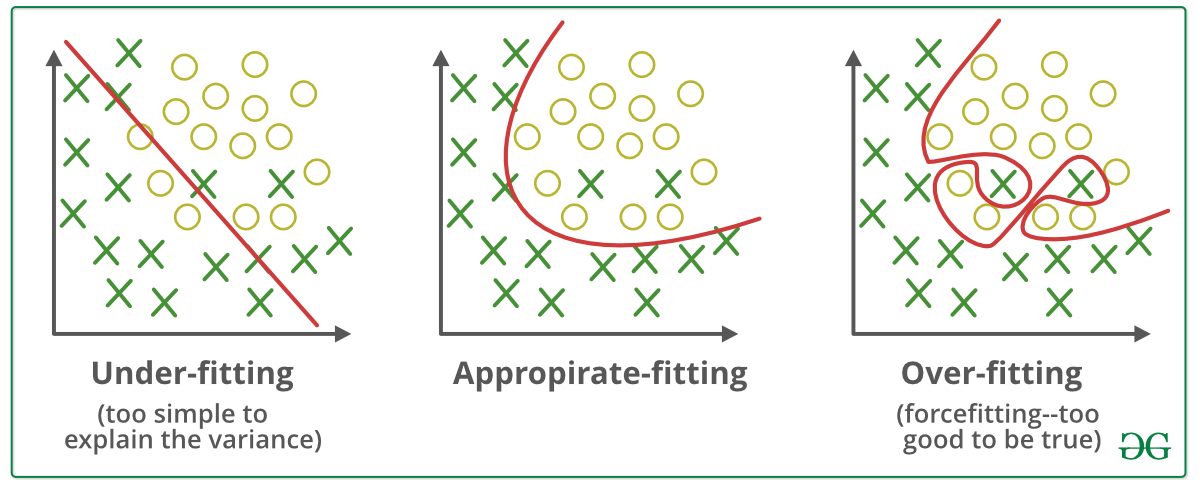

(30 хв)**Практика**

*код з минулого заняття:*

In [ ]:
import pandas as pd

# посилання до датасету з даними про будинки Мельбурну
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'

# Створіть об'єкт, який міститиме в собі наш датасет
melbourne_data = pd.read_csv(melbourne_file_path) 

######################
melbourne_data.columns

# Дані будинків Мельбурну містять пусті комірки (деякі змінні деяких характеристик будинків не були записані)
# Ми навчимося як працювати з опущеними даними згодом 
# А поки, щоб уникнути труднощів, ми не враховуватимемо ВСІ будинки, у яких є пропущені змінні

melbourne_data = melbourne_data.dropna(axis=0)

y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# Тут ми розіб'ємо дані на навчальні та перевірочні: що для X та y
# Розбиття (далі: спліт) базується на основі генератора випадкових чисел.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

(25 хв)**Середня похибка в залежності від кількості сплітів**

Існує кілька варіантів керуванню глибини дерева, і багато з них дозволяють, щоб деякі маршрути через "дерева рішень" мали більшу глибину, ніж інші маршрути. Але аргумент `max_leaf_nodes` забезпечує дуже розумний спосіб контролю переоснащення та недооснащення. Чим більше листків ми дозволяємо зробити моделі, тим більше ми переходимо від зони недооснащення до зони переоснащення.

Ми можемо використовувати *функцію корисності*, щоб потім допомогти порівняти оцінки **MAE** з різними значеннями для `max_leaf_nodes`:

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Ми можемо використовувати цикл `for`, щоб порівняти точність моделей, побудованих з різними значеннями для `max_leaf_nodes`.

In [ ]:
# порівняй середню похибку при дедалі більших max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Середня похибка:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Середня похибка:  385696
Max leaf nodes: 50  		 Середня похибка:  279794
Max leaf nodes: 500  		 Середня похибка:  261718
Max leaf nodes: 5000  		 Середня похибка:  271996


Звідси, робимо висновок, що найточніше модель працює в околицях значення "500" для `max leaf nodes`

##Урок 5: Random Forests

(30 хв) Ви вже кілька разів бачили як ми завантажуємо данні. Пригадаймо, що під кінець цього процесу у нас по суті є 4 підмасиви даних: 


1.   train_X
2.   val_X
3.   val_y
4.   train_y

Згадаймо вкотре цей код:

In [ ]:
import pandas as pd

# посилання до датасету з даними про будинки Мельбурну
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'

# Створіть об'єкт, який міститиме в собі наш датасет
melbourne_data = pd.read_csv(melbourne_file_path) 

######################
melbourne_data.columns

# Дані будинків Мельбурну містять пусті комірки (деякі змінні деяких характеристик будинків не були записані)
# Ми навчимося як працювати з опущеними даними згодом 
# А поки, щоб уникнути труднощів, ми не враховуватимемо ВСІ будинки, у яких є пропущені змінні

melbourne_data = melbourne_data.dropna(axis=0)

y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# Тут ми розіб'ємо дані на навчальні та перевірочні: що для X та y
# Розбиття (далі: спліт) базується на основі генератора випадкових чисел.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Ми будуємо модель `випадкового лісу` аналогічно до того, як ми створювали дерево рішень у scikit-learn, але цього разу використовуємо клас `RandomForestRegressor` замість `DecisionTreeRegressor`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146


Тут явно є місце для подальшого вдосконалення, але це вже значне поліпшення порівняно з найбільшою помилкою дерева рішень у 250 000. Існують параметри, які дозволяють вам змінити ефективність `Random Forests` так само, як при зміні максимальної глибини дерева рішень. Але однією з найкращих особливостей моделей `Random Forest` є те, що вони, як правило, працюють розумно навіть без такої настройки.

#Блок 2: занурення у машинне навчання


##Урок 6: пропущені дані

(30 хв) Існує багато шляхів, коли набір даних може опинитися з відсутніми значеннями. 

Наприклад,

1. Будинок з 2 спальнями не включає значення для розміру третьої спальні.
2. Респондент опитування може вирішити не ділитися своїми доходами.

Більшість бібліотек машинного навчання (включаючи `scikit-learn`) видають помилку при спробі побудувати модель із використанням даних із відсутніми значеннями. Тож вам потрібно буде використати одну із наведених нижче стратегій.

**Три стратегії**

1) *Простий варіант*: видаліть всі стовпці з відсутніми значеннями.

Але якщо більшість значень у скинутих стовпцях відсутні, то модель втрачає доступ до великої кількості (потенційно корисної!) інформації за такого підходу. Як екстремальний але цілком можливий приклад, розглянемо набір даних із 10000 рядків, де в одному важливому стовпці бракує одного запису. Такий підхід повністю опустив би колонку!

2) Кращий варіант: **імпутація**

Імпутація заповнює пропущені значення деяким числом. Наприклад, ми можемо заповнити пусті комірки середнім чи типовим значення вздовж кожного стовпця.

Приписане значення в більшості випадків буде не зовсім правильним, але воно, як правило, призводить до отримання більш точних моделей, ніж ви отримаєте від повного видалення стовпця.

3) **Розширена імпутація**
Імпутація - це стандартний підхід, який зазвичай працює добре. Однак обчислені значення можуть систематично перевищувати чи переменшувати їх фактичні значення (які не були зібрані в наборі даних). Або рядки з відсутніми значеннями можуть бути унікальними якимось іншим чином. У цьому випадку ваша модель може робити кращі прогнози, *враховуючи*, які значення спочатку відсутні.

У цьому підході ми імпутуємо відсутні значення, як і раніше. Але крім того, для кожного стовпця з відсутніми записами у вихідному наборі даних ми додаємо новий стовпець, який показує розташування імпутованих записів.

У деяких випадках це суттєво покращить результати. В інших випадках це зовсім не допомагає.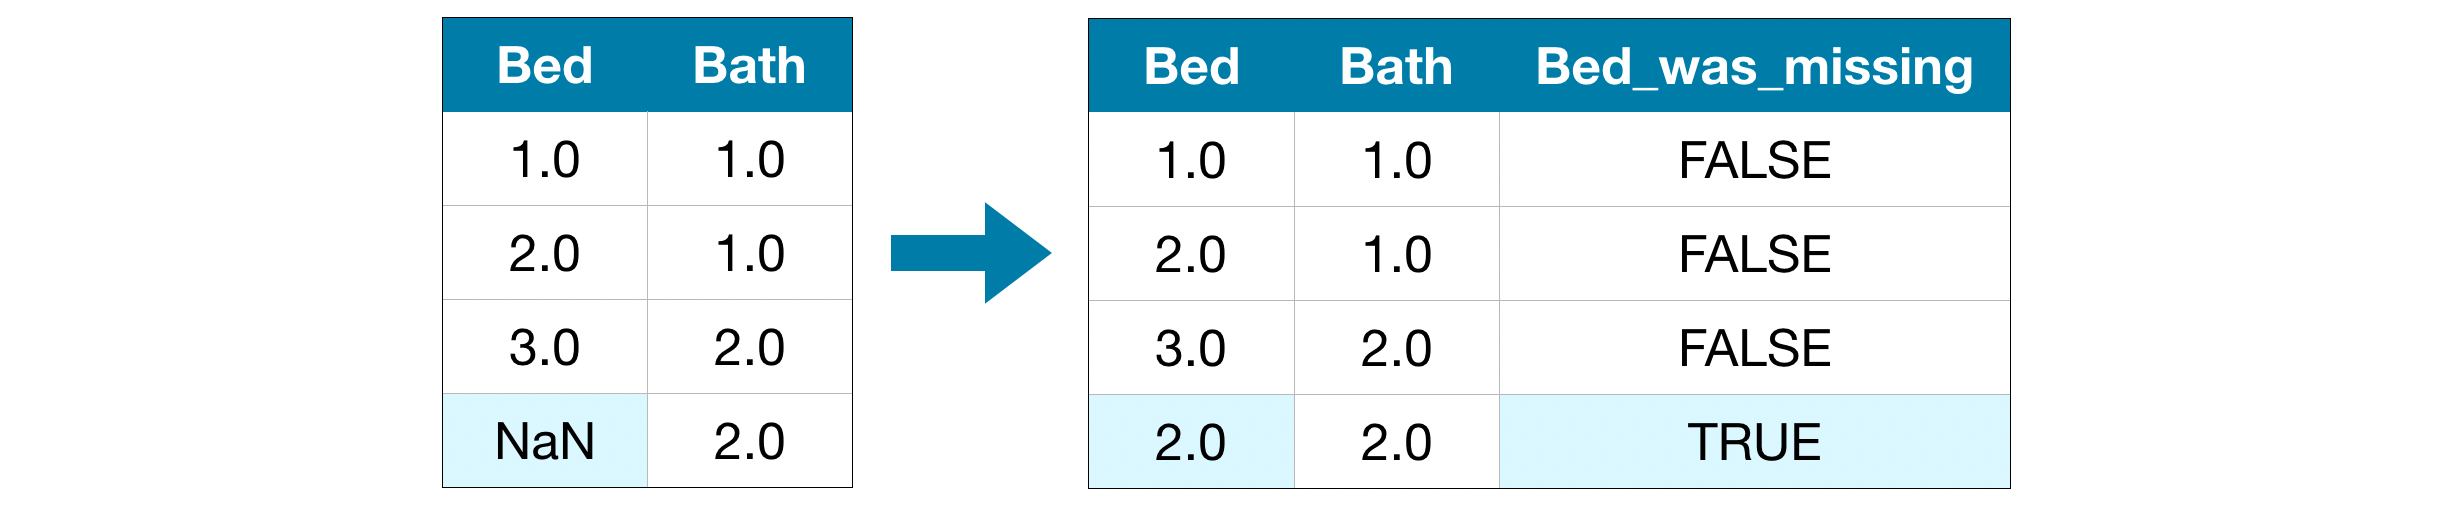

50 хв **Практика**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# завантаж дані
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'
data = pd.read_csv(melbourne_file_path)

# Обери ціль для прогнозів
y = data.Price

# Для упрощення задачі, ми дропнемо всі нечислові стовпці
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Ділимо дані на навчальні та тренувальні підгрупи
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

*Визначте функцію для вимірювання якості кожного підходу*

Визначаємо функцію `score_dataset()` для порівняння різних підходів до роботи з відсутніми значеннями. Ця функція повертає середню абсолютну похибку (MAE) із `random forest` моделі.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Функція, яку ми використаємо для порівняння кожного з підходів
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

**Оцінка першого підходу**

Оскільки ми працюємо як з навчальними, так і з наборами перевірки, ми обережно видаляємо однакові стовпці в обидва `DataFrames`.

In [ ]:
# колонки з пропущеними даними
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Видаляємо вищезазначені колонки
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE з Підходу 1 (видалити стовпці з пропущеними значеннями):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE з Підходу 1 (видалити стовпці з пропущеними значеннями):
183550.22137772635


**Оцінка другого підходу**

Далі ми використовуємо `SimpleImputer`, щоб замінити відсутні значення на середнє значення вздовж кожного стовпця.

Хоча це примітивний підхід, заповнення середнього значення, як правило, виконується досить добре (але це залежить від набору даних). Хоча статистики експериментували з більш складними способами визначення обчислюваних значень (імпутація регресії, наприклад), складні стратегії, як правило, не дають додаткової продуктивності.

In [ ]:
from sklearn.impute import SimpleImputer

# Імпутація
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Імпутація прибрала назви колонок; вертаємо їх назад!
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE з підходу 2 (Імпутація):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE з підходу 2 (Імпутація):
178166.46269899711


Можна уже помітити, що МАЕ для другого підходу менший, ніж для першого підходу. Отже, другий підхід більш близький до моделювання реальності

**Оцінка третього підходу**



Далі ми імпутуємо відсутні значення, одночасно відстежуючи, які значення були введені.

In [ ]:
# Робимо копію даних
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Нові колонки, які будуть локалізувати імпутовані дані
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Власне імпутація
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Iмпутація прибрала назви колонок; вертаємо їх назад!
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE з підходу 3 (Розширена імпутація):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE з підходу 3 (Розширена імпутація):
178927.503183954


Як ми бачимо, Підхід 3 моделює трохи гірше, ніж Підхід 2.

**Отже, чому імпутація вийшла краще, ніж скидання стовпців?**

Навчальні дані містять 10864 рядки та 12 стовпців, де три стовпці містять відсутні дані. Для кожного стовпця відсутня менше половини записів. Таким чином, скидання стовпців видаляє багато корисної інформації, і тому має сенс, що імпутація буде ефективнішою.

##Урок 7: Нечислові змінні

(30 хв) Нечислові змінні (також: **категоріальні** змінні) трапляються кількох типів:

1. Розгляньте опитування, яке запитує, як часто ви снідаєте, і пропонує чотири варіанти: "Ніколи", "Рідко", "Більшість днів" або "Кожен день". У цьому випадку дані є категоріальними, оскільки відповіді потрапляють у фіксований набір категорій.

2. Якби люди відповіли на опитування про те, якою маркою автомобілів вони володіли, відповіді потрапляли б у такі категорії, як "Honda", "Toyota" та "Ford". У цьому випадку дані також категоріальні.

Ви отримаєте помилку, якщо спробуєте підключити ці змінні до більшості моделей машинного навчання в Python без попередньої обробки. На цьому уроці ми порівняємо три підходи, які ви можете використовувати для підготовки своїх категоріальних даних.

**Три підходи**

1) *Видаліть категоріальні змінні*

Найпростіший підхід до роботи з категоріальними змінними - це просто видалити їх із набору даних. Цей підхід буде добре працювати, лише якщо стовпці не містять корисної інформації.

2) *Кодування лейблами (ярликами)*

Кодування міток присвоює кожне унікальне значення якомусь цілому числу.

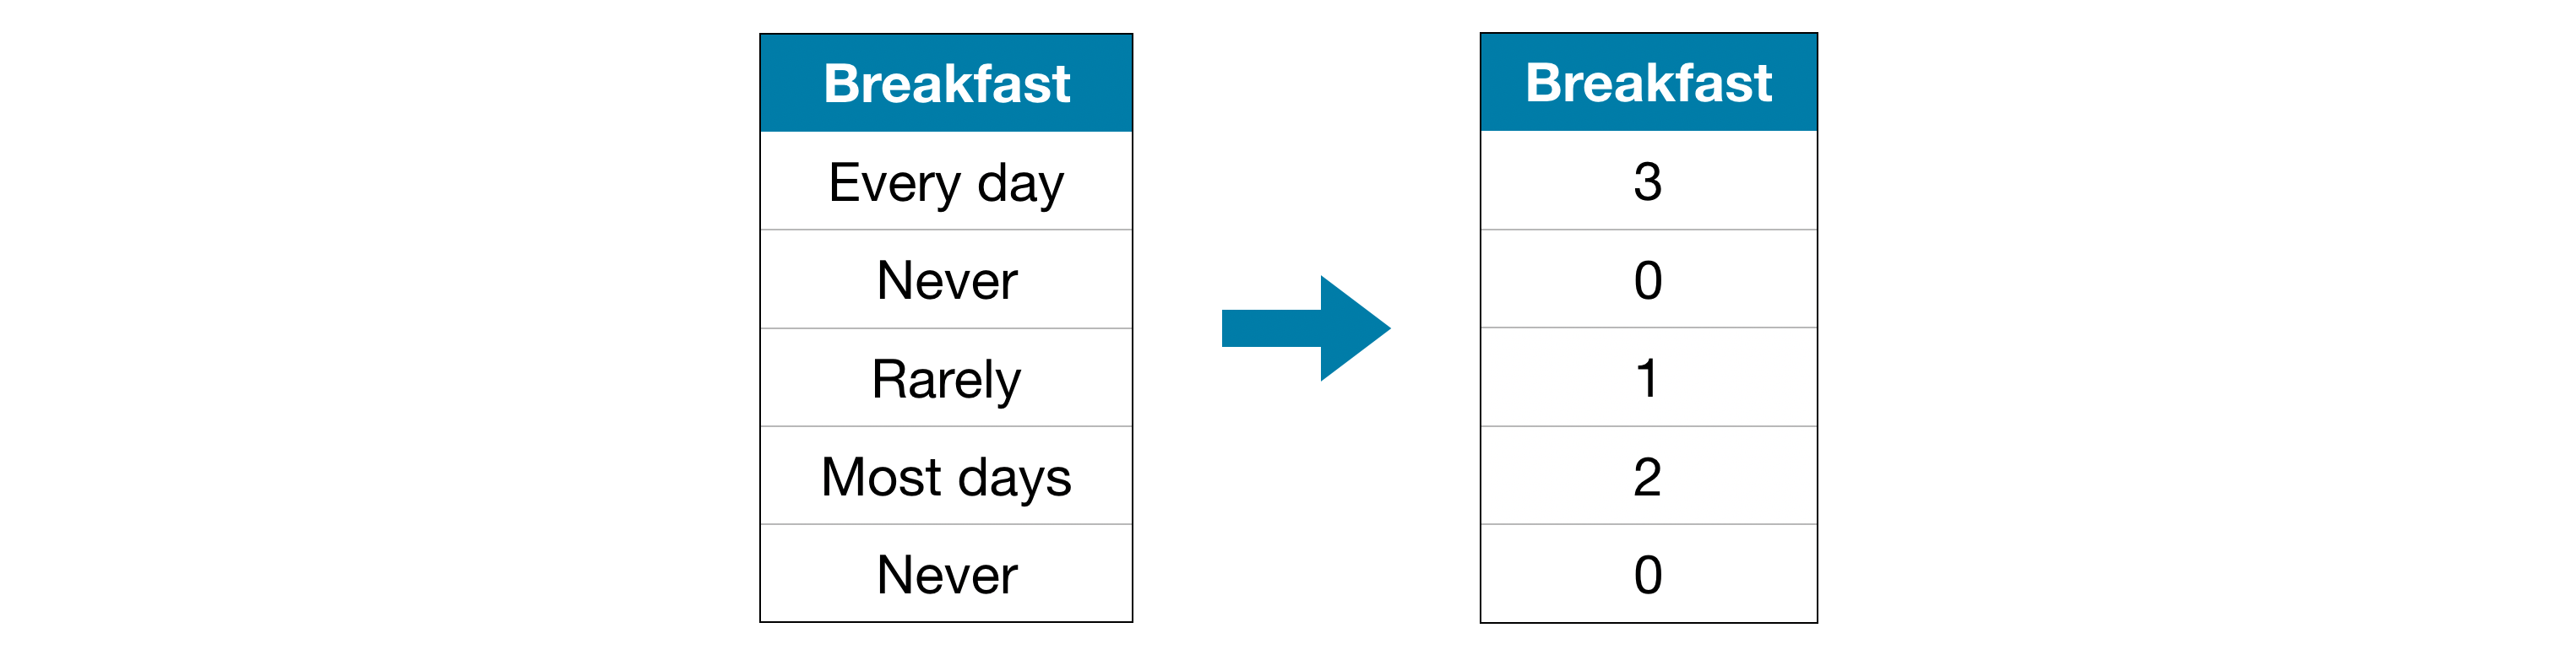

Цей підхід передбачає створення зв'язку: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

Це припущення має сенс у цьому прикладі, оскільки існує однозначний рейтинг категорій. Не всі категоріальні змінні мають чітке впорядкування значень, але ми посилаємось на них, як на порядкові змінні. Для моделей на основі дерев (таких як дерева рішень та random forests) можна очікувати, що кодування ярликами буде добре працювати з порядковими змінними.

**3) One-hot encoding**

One-hot encoding створює нові стовпці, що вказують на наявність (або відсутність) кожного можливого значення у вихідних даних. Щоб зрозуміти це, розгляньмо на прикладі.

В оригінальному наборі даних "Колір" - це категоріальна змінна з трьома категоріями: "Червоний", "Жовтий" та "Зелений". Відповідний one-hot encoding містить один стовпець для кожного можливого значення та один рядок для кожного рядка у вихідному наборі даних. Там, де початковим значенням було "Червоне", ми ставимо 1 у стовпці "Червоне"; якщо початкове значення було "Жовтий", ми ставимо 1 у стовпці "Жовтий" тощо.

На відміну від кодування ярликами, one-hot encoding не передбачає впорядкування категорій. Таким чином, ви можете очікувати, що такий підхід спрацює особливо добре, якщо в категоріальних даних немає чіткого впорядкування (наприклад, "Червоний" - це ні більше, ні менше, ніж "Жовтий"). Ми називаємо категоріальні змінні без внутрішнього ранжування іменними змінними.

Як правило, one-hot encoding погано працює, якщо категоріальна змінна приймає велику кількість значень (тобто, як правило, ви не будете використовувати one-hot encoding  для змінних, що приймають більше 15 різних значень).

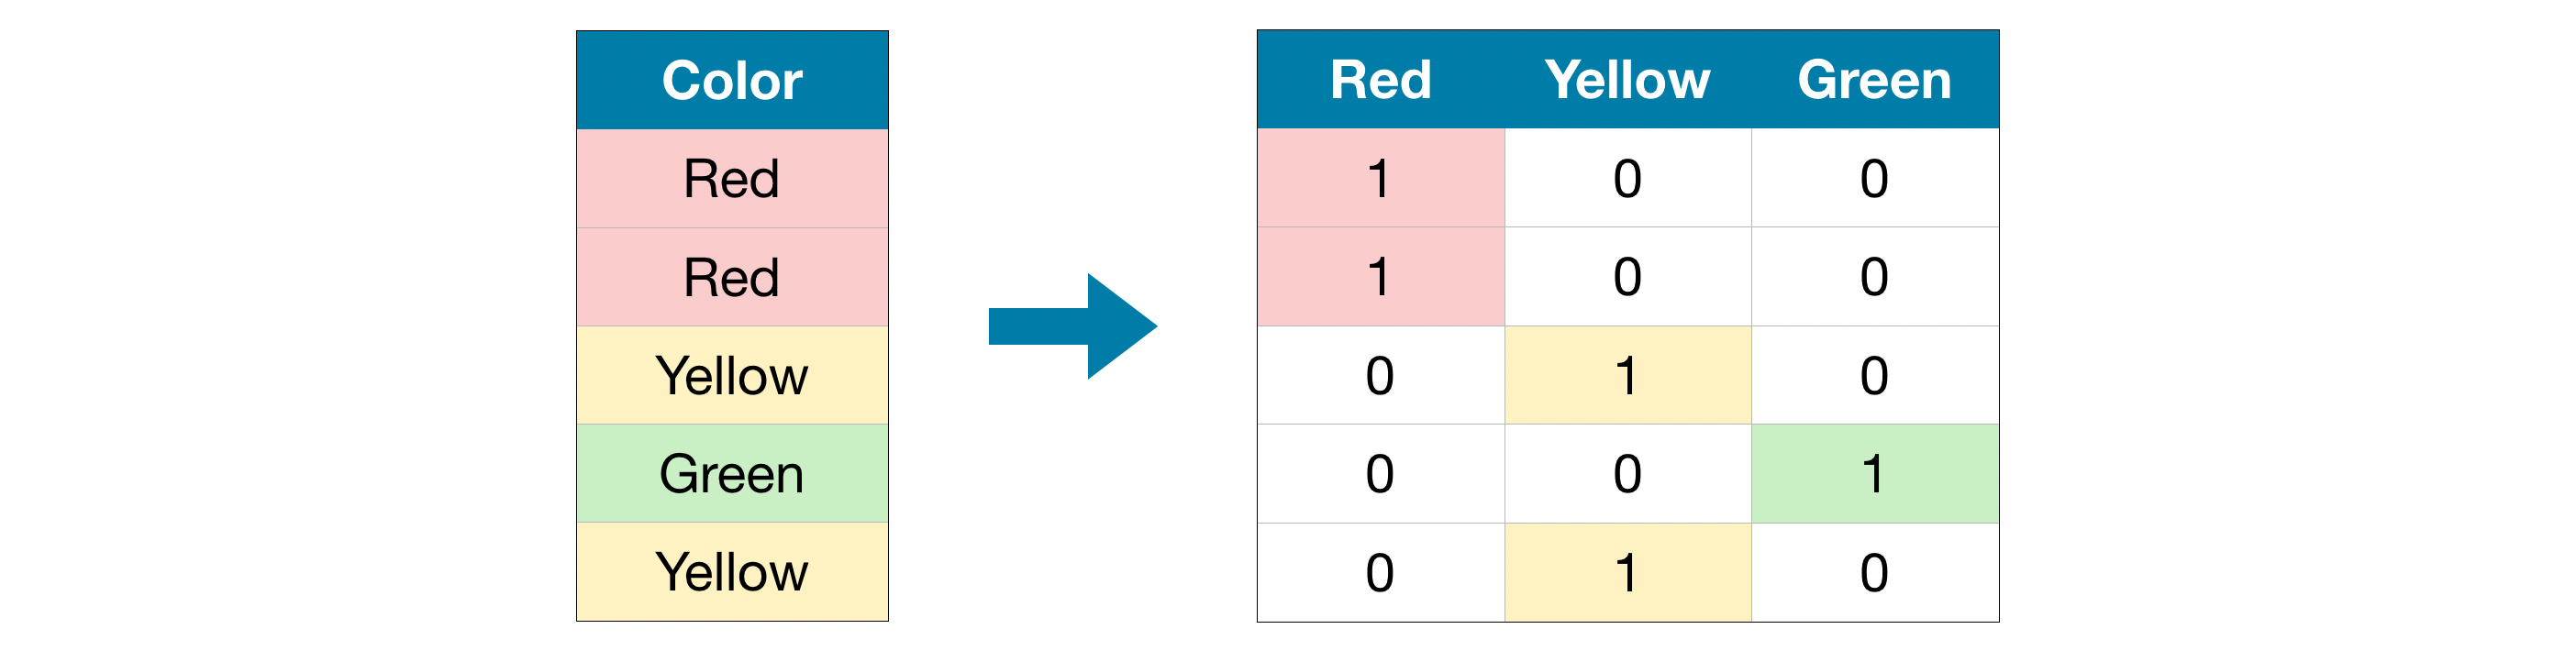

(50 хв) **Практика**

Завантаження даних

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Локалізовуємо дані
data = pd.read_csv('/content/drive/MyDrive/melb_data.csv')

# Відділяємо ціль для прогнозу від параметрів
y = data.Price
X = data.drop(['Price'], axis=1)

# Ділимо дані на навчальні та перевірочні підмасиви
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Дропаємо всі колонки з пропущеними значеннями (найпростіший підхід)
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

# "Кардинальність" означає к-сть унікальних значень у стовбці
# Оберіть колонки з низькою кардинальністю (прийнято брати 10, але це довільне значення)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Обери колонки з числовими значеннями
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Лишаємось лише з вибраними колонками
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Гляньмо на нашу щойно організовану таблицю

In [ ]:
X_train.head() #head -- верхні 5 рядків

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,0.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,193.0,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,555.0,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,265.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,673.0,-37.76230,144.8272,4217.0


Далі ми отримуємо список усіх категоріальних змінних у навчальних даних.

Ми робимо це, перевіряючи тип даних (`dtype`) кожного стовпця. Об'єкт `dtype` перевіряє чи в стовпці є текст (є й інші речі, які теоретично можуть бути корисними, але це неважливо для наших цілей). Для цього набору даних **стовпці з текстом** позначають **категоріальні змінні.**

In [ ]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Категоріальні змінні:")
print(object_cols)

Категоріальні змінні:
['Type', 'Method', 'Regionname']


Створимо функцію `score_dataset`, яка оцінить якість кожного підходу

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

**Підхід 1: видалення**

Дропаємо `object` через функцію `select_dtypes`

In [ ]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE через підхід 1:")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE через підхід 1:
175703.48185157913


**Підхід 2: ярликування**

`Scikit-learn` має клас `LabelEncoder`, який можна використовувати для отримання кодування ярликуванням. Ми перебираємо категоріальні змінні та застосовуємо лейбли окремо до кожного стовпця.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# робимо копію, щоб уникнути змінення оригінальних даних
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Застосовуємо label encoder до кожної колонки з категоріальними даними
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE через підхід 2:") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE через підхід 2:
165936.40548390493


**Підхід 3: one-hot encoding**

Ми використовуємо клас `OneHotEncoder` від `scikit-learn`, щоб отримати one-hot encoding. Існує ряд параметрів, за допомогою яких можна налаштувати його поведінку.

Ми встановлюємо `handle_unknown = 'ignore'`, щоб уникнути помилок, коли дані перевірки містять класи, які не представлені в навчальних даних, і
установлюємо `sparse = False`, що гарантує, що закодовані стовпці повертаються як `numpy`-масив (замість sparse matrix).

Для використання one-hot encoding ми надаємо лише категоріальним стовпцям one-hot encoding. Наприклад, для кодування навчальних даних ми локалізовуємо `X_train [object_cols]`. (`object_cols` у комірці нижче - це перелік назв стовпців із категоріальними даними, і тому `X_train [object_cols]` містить усі категоріальні дані у навчальному наборі.)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Застосуємо one-hot encoder до кожної колонки з категоріальними даними
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding видалили індекси; вернімо їх!
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Вилучаємо категоріальні стовбці (доповнимо їх потім через one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Зливаємо one-hot encoded стовбці з числовими стовбцями
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE через Підхід 3:") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE через Підхід 3:
166089.4893009678


У цьому випадку відмова від категорійних стовпців (Підхід 1) виявилася найгіршою, оскільки вона мала найвищий бал MAE. Що стосується інших двох підходів, оскільки повернені оцінки MAE досить близькі за значенням, здається, ніякої суттєвої різниці немає.

Як правило, **one-hot encoding** (Підхід 3), формує найкращі результати, а скидання категоріальних стовпців (Підхід 1), як правило, найгірше, але залежить від випадку до випадку.

##Урок 8: Конвеєр (pipeline)

(10 хв) Конвеєри - це простий спосіб організувати код моделювання даних. Зокрема, конвеєр поєднує кроки попередньої обробки та моделювання, щоб ви могли використовувати весь комплект так, немов це був би один крок.

Багато вчених наук про дані надають перевагу моделям без конвеєрів, але вони мають деякі важливі переваги. До них належать:

1. Чистіший код: Облік даних на кожному етапі попередньої обробки може бути безладним. За допомогою конвеєра вам не потрібно буде відстежувати навчальні дані та дані перевірки вручну на кожному кроці.

2. Менше помилок: менше можливостей неправильно виконати крок.

3. Простіші у запусці: може бути напрочуд важко перевести модель з прототипу на щось, що можна розгорнути в перспективі. Ми не будемо вдаватися до багатьох пов'язаних з цим проблем, але `pipelines` можуть допомогти.

4. Додаткові параметри перевірки моделі: розглянемо на наступному уроці про перехресну перевірку

(60 хв) **Практика**

З минулого заняття:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Локалізовуємо дані
data = pd.read_csv('/content/drive/MyDrive/melb_data.csv')

# Відділяємо ціль для прогнозу від параметрів
y = data.Price
X = data.drop(['Price'], axis=1)

# Ділимо дані на навчальні та перевірочні підмасиви
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

#Категоріальні колонки
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

#Числові колонки
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Лишаємо лише обрані колонки
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

Ми зазирнемо до даних тренувань методом `head()` нижче. Зверніть увагу, що дані містять як категоріальні дані, так і стовпці з відсутніми значеннями. З конвеєрами легко впоратися з обома труднощами!

In [ ]:
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


**Крок 1**

Подібно до того, як конвеєр об’єднує кроки попередньої обробки та моделювання, ми використовуємо клас `ColumnTransformer` для об’єднання різних кроків попередньої обробки. Код нижче:

1. вказує відсутні значення в числових даних
2. обчислює відсутні значення та застосовує one-hot encoding до категоріальних даних.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Крок 2**: визначити тип моделі


Застосуємо random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

**Крок 3**: збираємо до купи

Нарешті, ми використовуємо клас `Pipeline`, щоб визначити конвеєр, який об’єднує етапи попередньої обробки та моделювання. Є кілька важливих речей, на які слід звернути увагу:

За допомогою конвеєра ми попередньо обробляємо навчальні дані та вміщуємо модель в один рядок коду. (без конвеєра нам довелося би розбити обчислення, one-hot encoding та навчання моделі на окремі етапи)

За допомогою конвеєра ми надаємо необроблені функції в `X_valid` до команди `predict()`, і конвеєр автоматично попередньо обробляє функції перед генеруванням прогнозів.

In [ ]:
from sklearn.metrics import mean_absolute_error

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Тренуємо модель
my_pipeline.fit(X_train, y_train)

# Створюємо масив передбачень
preds = my_pipeline.predict(X_valid)

# оцінюємо модель
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 160679.18917034855


##Урок 9: перехресна перевірка моделі

(50 хв) Машинне навчання - це ітераційний (циклічний) процес.

Ви будете стикатися з вибором щодо того, які прогнозувальні змінні використовувати, які типи моделей використовувати, які аргументи подавати до цих моделей і т.д. На сьогоднішній день ви робили цей вибір на основі даних, вимірюючи якість моделі через валідацію.

Але у цього підходу є деякі недоліки:

Уявіть, що у вас є набір даних із 5000 рядків. Зазвичай ви виділяєте близько 20% даних як набір даних перевірки (тобто 1000 рядків). Але це залишає фактор рандому у визначенні оцінок моделі. Тобто модель може добре працювати на одному наборі з 1000 рядків, навіть якщо вона буде неточною на інших 1000 рядках.

Для простоти, уявіть, що у наборі перевірки є лише 1 рядок даних. Якщо ви порівнюєте альтернативні моделі, то яка з них робить найкращі прогнози для одного набору даних - це здебільшого питання удачі!

Загалом, чим більший набір перевірок, тим менше випадковості (він же **"шум"**) є в нашому вимірюванні якості моделі, і тим надійнішим він буде. На жаль, ми можемо отримати великий набір перевірок, лише видаливши рядки з наших навчальних даних, а менші набори навчальних даних означають гірші моделі! Який вихід?

**Перехресна перевірка**

Під час *перехресної перевірки* ми запускаємо процес моделювання на різних підмножинах даних, щоб отримати кілька показників якості моделі.

Наприклад, розділимо дані на 5 частин, кожна 20% від повного набору даних. У цьому випадку ми кажемо, що ми розбили дані на 5 **«складок»**.

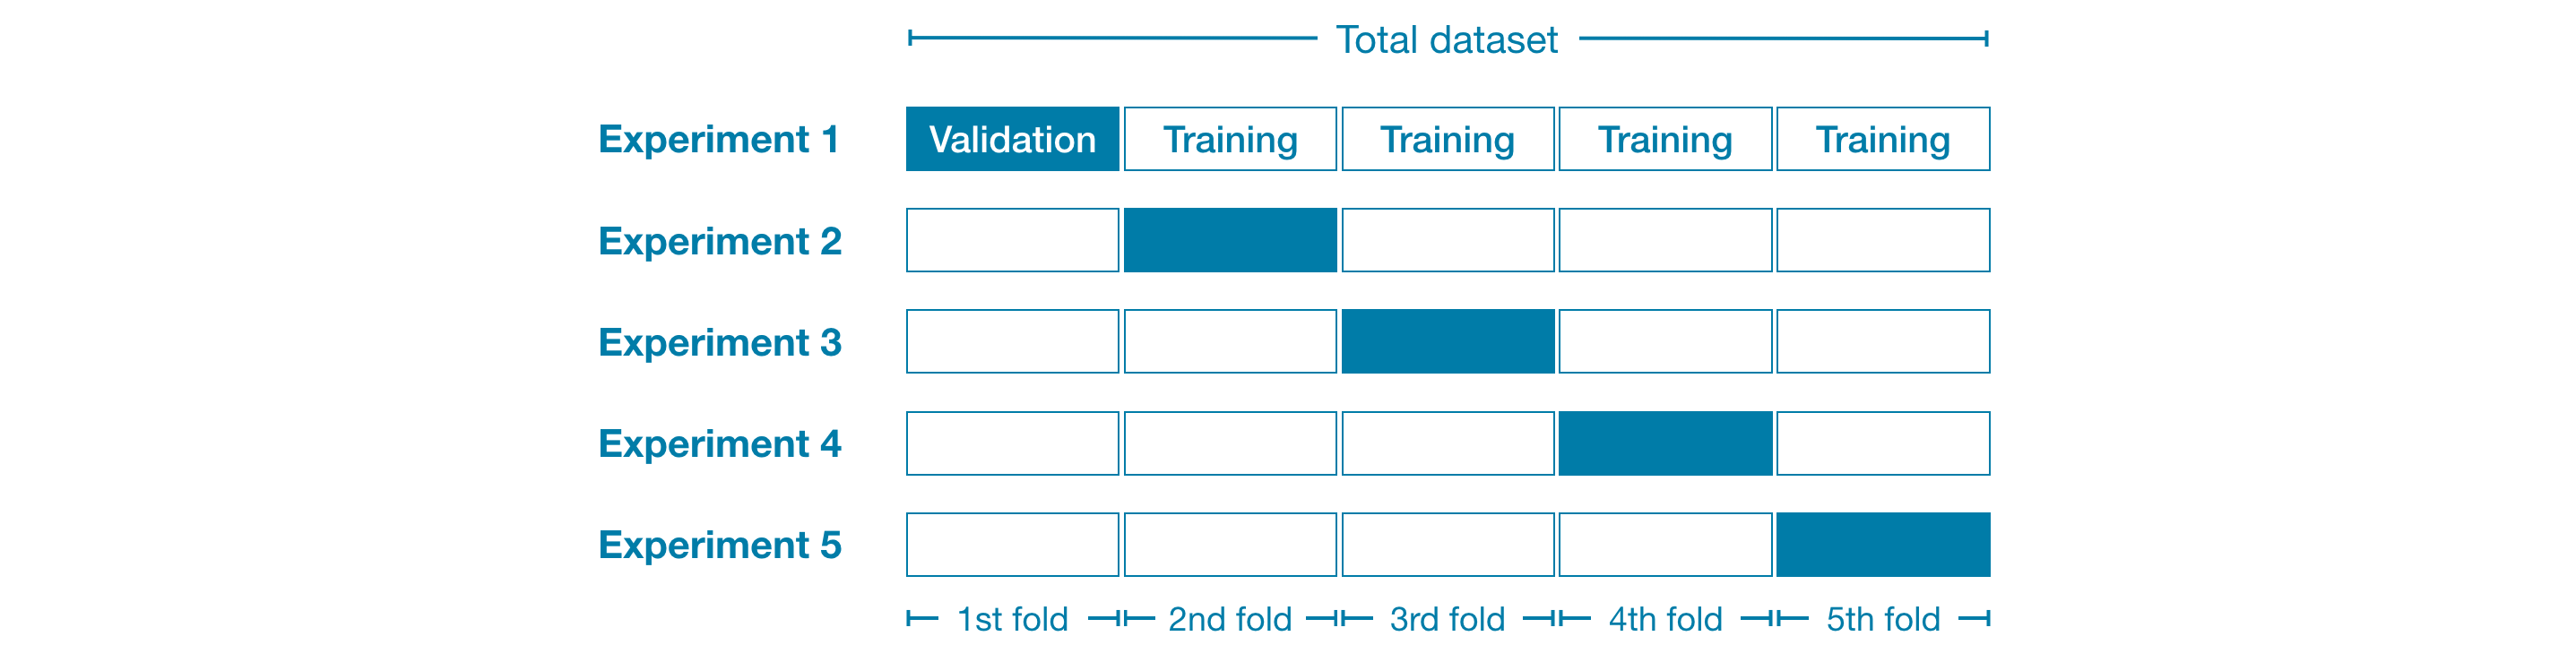

Потім ми проводимо по одному експерименту для кожної складки послідовно:

1. В експерименті 1 ми використовуємо першу складку як для *перевірки*, а все інше як *навчальні дані*. Це дає нам показник якості моделі на основі набору з інтервалом 20%.
2. В експерименті 2 ми витягуємо дані з другої складки (і використовуємо все, крім другої складки для *навчання моделі*). Потім набір з решти чотирьох складок використовується для отримання другої оцінки якості моделі.
3. Ми повторюємо цей процес, використовуючи кожну складку як набір перевірки. Склавши разом, виходить, що 100% даних в певний момент використовується для перевірки, і в результаті ми отримуємо показник якості моделі, який базується на всіх рядках набору даних (навіть якщо ми не використовуємо всі рядки одночасно)!!!

**Коли юзати?**

Перехресна перевірка дає більш точний показник якості моделі, що особливо важливо, якщо ви приймаєте багато модельних рішень. Однак запуск може зайняти більше часу, оскільки він оцінює кілька моделей послідовно (по одній на кожну складку).

Отже, враховуючи ці компроміси, коли слід використовувати кожен підхід?

1. Для малих наборів даних, де додаткове обчислювальне навантаження не є великою проблемою, тому слід запустити перехресну перевірку.
2. Для більших наборів даних достатньо одного набору перевірки. Ваш код буде працювати швидше, і у вас може бути достатньо даних, тому вам не потрібно буде повторно використовувати деякі з них.

Не існує простого порогового значення для того, що відрізняє великий чи малий набір даних. Але якщо ваша модель займає пару хвилин або менше, можливо, варто перейти на *перехресну перевірку*.

Крім того, ви можете запустити перехресну перевірку та перевірити, чи результати для кожного експерименту здаються подібними. Якщо кожен експеримент дає однакові результати, можливо, достатньо одного набору перевірки.

(30 хв) **Практика**

*Завантаєумо дані (як завжди)*

In [ ]:
import pandas as pd

# Локалізовуємо дані
data = pd.read_csv('/content/drive/MyDrive/melb_data.csv')

# Вибрати параметри
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Обрати ціль для прогнозів
y = data.Price

Потім ми створюємо конвеєр, який використовує імпутер для заповнення відсутніх значень та модель `random forest` для прогнозування.

Хоча можливо зробити перехресну перевірку без конвеєрів, це досить складно! Використання конвеєра зробить код надзвичайно простим :)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

Оцінки перехресної перевірки ми отримуємо за допомогою функції `cross_val_scor()` від `scikit-learn`. Ми встановлюємо кількість складок за допомогою параметра `cv`.

In [ ]:
from sklearn.model_selection import cross_val_score

# Перемнож на -1 оскільки sklearn обчислює *від'ємне* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE оцінки:\n", scores)

MAE оцінки:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


Зазвичай ми хочемо єдиний показник якості моделі для порівняння альтернативних моделей. Тому, ми беремо середнє значення для експериментів.

In [ ]:
print("Середнє MAE (серед експериментів):")
print(scores.mean())

Середнє MAE (серед експериментів):
277707.3795913405


##Урок 10: XGBoost

(30 хв) XGBoost - це провідна бібліотека програмного забезпечення для роботи зі стандартними табличними даними (тип даних, які ви зберігаєте в` Pandas DataFrames`, на відміну від більш екзотичних типів даних, таких як зображення та відео). Ретельно налаштувавши параметри, ви можете навчити високоточні моделі!

На цьому уроці ви дізнаєтеся, як будувати та оптимізувати моделі з **посиленням градієнта**. Цей метод досягає найдосконаліших результатів на різноманітних наборах даних.

**Інтро**

Більшу частину цього курсу ви робили прогнози за допомогою методу `random forests`, який досягає кращих показників, ніж одне дерево рішень, просто шляхом пошуку середнього арифметичного серед прогнозів багатьох дерев рішень.

Ми називаємо метод `random forests `**"методом ансамблю"**. За визначенням, **ансамблеві методи** поєднують передбачення декількох моделей (наприклад, декількох дерев, у випадку `random forests `).

Далі ми дізнаємося про інший метод ансамблю, який називається **посиленням градієнта.**

**Посилення градієнта**

**Посилення градієнта** - це метод, який проходить цикли, щоб ітеративно додавати моделі в ансамбль.

Починається з ініціалізації ансамблю однієї моделі, прогнози якої можуть бути досить наївними (тобто примітивними). Навіть якщо його прогнози надзвичайно неточні, наступні доповнення до ансамблю усунуть ці суттєві похибки.

Потім ми починаємо цикл:

1. По-перше, ми використовуємо поточний ансамбль для генерації прогнозів для кожного спостереження в наборі даних. Щоб зробити прогноз, ми враховуємо прогнози з усіх моделей ансамблю.
2. Ці прогнози використовуються для обчислення функції втрат (*loss*) (наприклад, як середньоквадратична помилка).
3. Потім ми використовуємо функцію втрат, щоб підібрати нову модель, яка буде додана до ансамблю. Зокрема, ми визначаємо параметри моделі, щоб додавання цієї нової моделі до ансамблю зменшило втрати. (примітка: "Градієнт" у "посиленні градієнта" стосується того факту, що ми використовуватимемо *градієнтний спуск* на функцію втрат для визначення параметрів у цій новій моделі.)
Нарешті, ми додаємо нову модель до ансамблю, і ...
... повторити!

(50 хв)**Практика**

знову таки, готуємо наш датасет з нерухомістю:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# завантаж дані
melbourne_file_path = '/content/drive/MyDrive/melb_data.csv'
data = pd.read_csv(melbourne_file_path)

# Вибери параметри для передбачення
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Вибери ціль для прогнозування
y = data.Price

# Розділи дані на тренувальні та перевірочні підгрупи
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

У цьому прикладі ви будете працювати з бібліотекою `XGBoost`. `XGBoost` означає екстремальне посилення градієнта *(extreme gradient boosting*), яке є реалізацією посилення градієнта з кількома додатковими функціями, орієнтованими на продуктивність та швидкість. (`Scikit-learn` має ще одну версію посилення градієнта, але `XGBoost` має деякі технічні переваги.)

У наступній комірці коду ми імпортуємо API `scikit-learn` для `XGBoost` (`xgboost.XGBRegressor`). Це дозволяє нам будувати та підганяти модель так само, як це було б при scikit-learn. Як ви побачите у вихідних даних, клас `XGBRegressor` має багато параметрів для налаштування - про них ви дізнаєтесь найближчим часом!

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

[21:02:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Також, ми можемо оцінити точність моделі:

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Середня похибка: " + str(mean_absolute_error(predictions, y_valid)))

Середня похибка: 272039.0925257732


**Налаштування параметрів**

**XGBoost** має кілька параметрів, які можуть суттєво вплинути на точність і швидкість навчання. Перші параметри, які ви повинні знати:

`n_estimators`

n_estimators визначає, скільки разів пройти цикл моделювання, описаний вище. Це дорівнює кількості моделей, які ми включаємо в ансамбль.

* Занадто низьке значення спричиняє *недооснащення*, що призводить до неточних прогнозів як щодо даних тренувань, так і даних тестів.
* Занадто велике значення спричиняє *переоснащення*, що спричиняє точні прогнози щодо даних тренувань, але неточні прогнози щодо даних тестів (що саме нас і цікавить).
Типові значення знаходяться в межах 100-1000, хоча це багато в чому залежить від параметру `learning_rate`, обговореного нижче.

Ось код для встановлення кількості моделей в ансамблі:

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

[21:02:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

`early_stopping_rounds`

early_stopping_rounds пропонує спосіб автоматичного пошуку ідеального значення для `n_estimators`. Рання зупинка змушує модель перестати повторюватись, коли оцінка перевірки перестає покращуватися, навіть якщо ми не знаходимося на жорсткій зупинці для n_estimators. Розумно встановити високе значення для `n_estimators`, а потім використовувати `early_stopping_rounds`, щоб знайти оптимальний час для припинення ітерації.

Оскільки випадковість іноді спричиняє один раунд таких ітерацій, то коли оцінки валідації не покращуються, вам потрібно вказати число, скільки раундів прямого погіршення дозволити перед зупинкою. Встановлення `early_stopping_rounds = 5` є типовим вибором. У цьому випадку ми зупиняємося після 5 раундів погіршення балів перевірки.

При використанні early_stopping_rounds вам також потрібно виділити деякі дані для обчислення балів перевірки - це робиться шляхом встановлення параметра `eval_set`.

Змінимо код вище, щоб включити ранню зупинку:

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

[21:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)



`learning_rate`

Замість того, щоб отримувати прогнози, просто складаючи передбачення з кожної моделі компонентів, ми можемо помножити передбачення з кожної моделі на невелике значення (відоме як швидкість навчання) перед їх додаванням.

Це означає, що кожне дерево, яке ми додаємо до ансамблю, допомагає нам менше. Отже, ми можемо встановити вищі значення для n_estimators, без `переоснащення`. Якщо ми застосуємо ранню зупинку, відповідна кількість дерев буде визначена автоматично.

Загалом, невелика швидкість навчання та велика кількість n_estimators дадуть більш точні моделі XGBoost, хоча для навчання також знадобиться більше часу, оскільки вона робить більше ітерацій протягом циклу. За замовчуванням XGBoost встановлює швидкість навчання = 0,1.

Модифікація наведеного вище прикладу для зміни швидкості навчання дає такий код:

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

[21:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

`n_jobs`

У більших наборах даних, де час роботи є важливим, ви можете використовувати паралелізм, щоб швидше будувати свої моделі. Загальноприйнятим є встановлення параметра `n_jobs` рівним кількості ядер на вашому компуктері. На менших наборах даних це не допоможе.

Отримана модель не буде нічим кращою, тому мікрооптимізація часу підгонки, як правило, це ні що інше, як відволікання уваги :) . Але це корисно у великих наборах даних, де ви в іншому випадку витратили б довше часу на очікування під час команди `fit`.

Ось модифікований приклад:

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

[21:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#Блок 3: Вступ у нейронні мережі

##Урок 11: Ваш перший нейрон

(40 хв)**Вступ**

*Що таке глибинне навчання?*

Деякі з найбільш вражаючих досягнень штучного інтелекту за останні роки були саме у галузі глибинне навчання. Переклад природної мови, розпізнавання зображень та ігри - це все завдання, де моделі глибинного навчання наблизились або навіть перевершили показники рівня людини.

То що таке глибинне навчання? Глибинне навчання - це підхід до машинного навчання, що характеризується глибинними стеками обчислень. Ця глибина обчислень дозволила моделям глибинного навчання розплутати різновиди складних та ієрархічних зразків, знайдених у найскладніших наборах даних у реальному світі.

Завдяки своїй потужності та масштабованості нейронні мережі стали визначальною моделлю глибокого навчання. Нейронні мережі складаються з нейронів, де кожен нейрон окремо виконує лише прості обчислення. Потужність нейронної мережі походить від складності зв’язків, які ці нейрони можуть утворити.

**Лінійний блок**

Отже, почнемо з фундаментальної складової нейронної мережі: окремого **нейрона**. На діаграмі нейрон (або лінійна одиниця) з одним входом виглядає так:

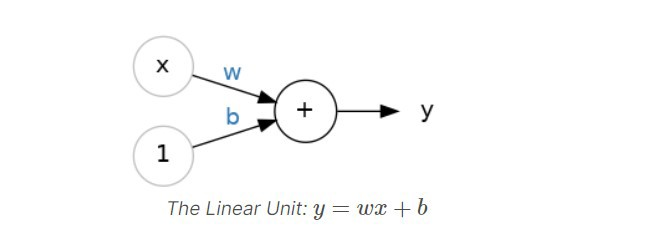

Де:

Вхідне значення **x**. Його зв’язок з нейроном має вагу, яка становить **w**. Всякий раз, коли значення протікає через *з'єднання*, ви перемножуєте вхідне значення на вагу з'єднання. **Нейронна мережа "вчиться", змінюючи свої значення ваги.**

**b** - особливий вид ваги, який ми називаємо упередженням (англ. *bias*). Упередження не мають жодних вхідних даних, пов’язаних з ними; натомість ми ставимо на діаграмі довільне значення` 1` так, щоб значення, яке досягає нейрона, було просто b (оскільки 1 * b = b). Упередження дозволяє нейрону змінювати вихід незалежно від його входів.

**У** - значення, яке нейрон в кінцевому підсумку виводить. Щоб отримати вихід, нейрон підсумовує всі значення, які він отримує через свої *зв’язки*. Активація цього нейрона це `y = w * x + b`.



**Приклад - Лінійний блок як модель**

Хоча окремі нейрони зазвичай функціонують лише як частина більшої мережі, часто корисно починати з моделі одиничного нейрона для початку. Моделі одиночних нейронів - це лінійні моделі.

Навчаючи модель із використанням  *цукрів* (грам цукру на порцію) як вхідних даних та *калорій* (калорій на порцію) як вихідних даних, ми виявили упередження b = 90, а вагу w = 2,5

Ми можемо оцінити вміст калорій у крупі з 5 грамами цукру на порцію так:

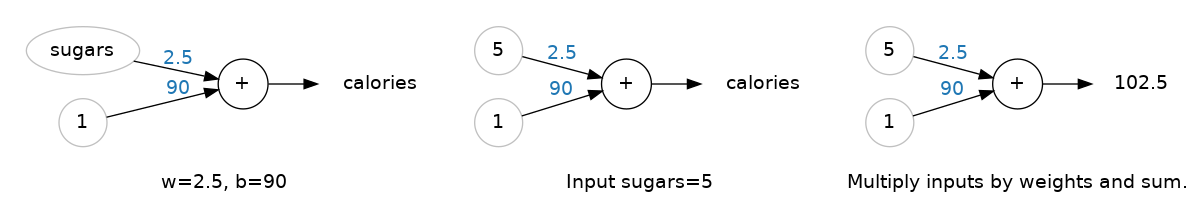

Підставляючи у формулу y = w * x + b, якраз отримуємо очікувані 102.5 калорій!

**Кілька входів**

Набір даних *80 cereals* має набагато більше параметрів, ніж просто „sugars”. Що, якби ми хотіли розширити нашу модель, включивши такі речі, як вміст клітковини або білка? Це досить просто. Ми можемо просто додати більше вхідних з'єднань до нейрона, по одному для кожної додаткової функції. Щоб знайти вихідні дані, ми помножимо кожен вхід на вагу з'єднання, а потім складемо їх усі разом.

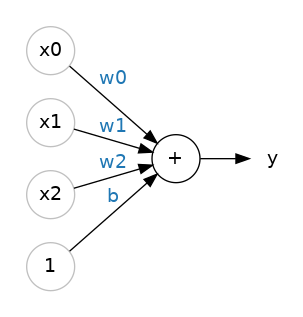

Результуючий вихід `y = w0*x0 + w1*x1 + w2*x2 + b `

Лінійний блок з двома входами можна репрезентувати через формулу **площини**, а більше, ніж з двома, через **гіперплощини**.



10 хв **Бібліотека Keras**

Найпростіший спосіб створити модель у Keras - це за допомогою `keras.Sequential`, який створює нейронну мережу як стек (стопку) шарів.

Ми визначаємо лінійну модель, яка приймає три вхідні параметри ('sugars', 'fiber', and 'protein') і дає один вихід ('calories') таким чином:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Створи мережу з одним лінійним блоком
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

##Урок 12: Нейронні мережі

(40 хв) **Шари**

Нейронні мережі зазвичай організують свої нейрони в **шари**. Коли ми збираємо разом лінійні блоки, що мають загальний набір входів, ми отримуємо **щільний шар** (dense layer).

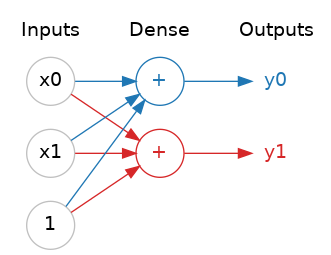

Можна уявляти кожен шар нейронної мережі як якусь відносно просту трансформацію. Завдяки глибокому стеку шарів нейронна мережа може трансформувати свої входи все більш і більш складними способами. У добре натренованій нейронній мережі кожен шар є такою трансформацією, яка наближає нас якомога ближче до рішення.

**Функція активації**

Виявляється, що два щільних шари, без нічого проміжного, не кращі за один щільний шар сам по собі. Щільні шари самі по собі ніколи не зможуть вивестися зі світу лінійних функцій і площин. Нам потрібно щось ***нелінійне***. Нам потрібні функції активації.

Функція активації - це просто якась функція, яку ми застосовуємо до кожного з вихідних даних шару (його активації). Найбільш поширеною є **випрямляча функція** `max (0, x)`.

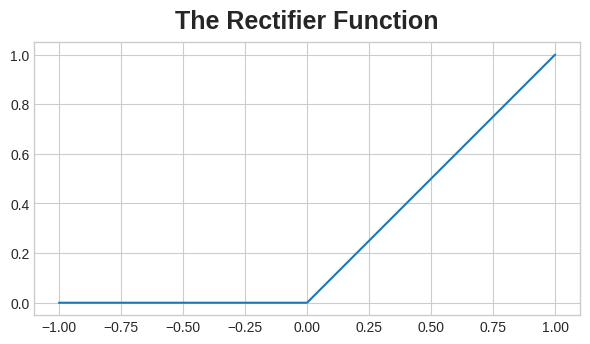

Функція випрямляча має графік, який є лінією з від'ємною частиною "випрямленою" до нуля.

Коли ми застосовуємо "випрямляч" до лінійного блоку, ми отримуємо випрямлений лінійний блок або **ReLU**. (З цієї причини прийнято називати випрямляючу функцію "функцією ReLU".) Застосування активації ReLU до лінійного блоку означає, що вихід стає

 ` max(0, w * x + b)`,
  що ми можемо накреслити на схемі, як :

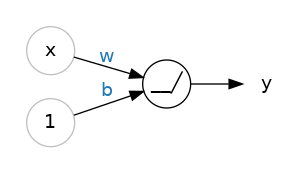

**Упорядковуючи щільні шари**

Тепер, коли у нас нарешті є певна нелінійність, давайте подивимося, як можна скласти шари, щоб отримати складні перетворення даних

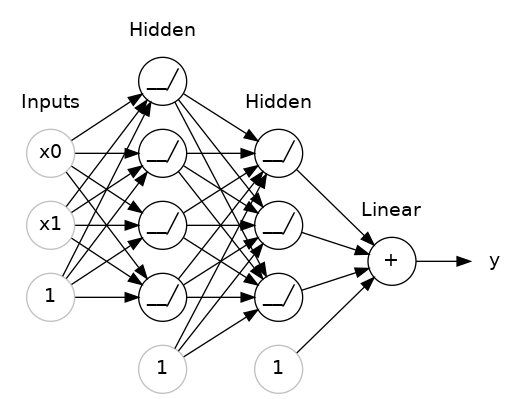

Шари перед вихідним шаром іноді називають ***прихованими***, оскільки ми ніколи не бачимо їх результати *безпосередньо*.

Тепер зауважте, що кінцевий (вихідний) шар є лінійним блоком (тобто з відсутньою функцією активації). Це робить цю мережу придатною для завдання регресії, де ми намагаємося передбачити якесь довільне числове значення. Інші завдання (наприклад *класифікація*) можуть вимагати активації функції на виході.

**ПРАКТИКА**

Модель `Sequential` , яку ми використовували, з’єднує список шарів у порядку від першого до останнього: перший шар отримує вхідні дані, останній шар видає вихідні дані. Це створює модель на малюнку вище:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # приховані ReLU шари
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # лінійний вихідний шар
    layers.Dense(units=1),
])

###Візуалізація даних через Matplotlib

Matplotlib -- це бібліотека, яка дуже корисна для візуалізації графіків. Розглянемо найпростіший приклад, де функція приймає два масиви

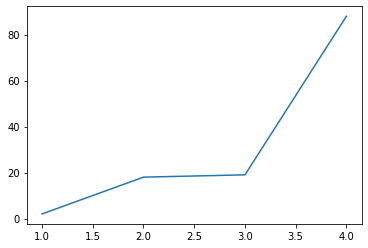

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([1, 2, 3, 4], [2, 18, 19, 88])

Код для побудови графіку "RELU"

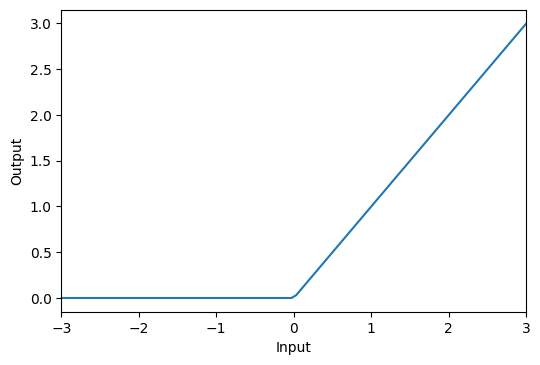

In [ ]:
import tensorflow as tf

activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

##Урок 13: Стохастичний градієнт

(50 хв)**Огляд**

На перших двох уроках ми дізналися, як будувати повністю зв’язані мережі із наборів щільних шарів. При першому створенні всі ***ваги*** мережі встановлюються випадковим чином - мережа ще нічого не знає. На цьому уроці ми побачимо, як тренувати нейронну мережу; ми дізнаємося, як нейронні мережі **навчаються**.

Як і у всіх завданнях машинного навчання, ми починаємо з *набору навчальних даних*:

Кожен приклад у навчальних даних складається з кількох параметрів (вхідних даних) разом із очікуваними прогнозами (вихідними даними). Навчання мережі означає коригування її вагів таким чином, щоб вона могла застосувати функції для прогнозування. Наприклад, у наборі даних 80 злаків ми хочемо створити мережу, яка зможе приймати вміст цукру, клітковини та білка в кожній каші та формувати прогноз щодо “калорійності” цієї каші. Якщо ми зможемо успішно навчити мережу робити це, її ваги повинні якимось чином відображати взаємозв'язок між цими параметрами та ціллю, як це виражено в навчальних даних.

Окрім навчальних даних, нам потрібні ще дві речі:

1. "Функція втрат", яка вимірює, наскільки якісними є прогнози мережі.
2. "Оптимізатор", який може підказати мережі, як змінювати свою вагу.

**Функція втрат**

Ми бачили, як розробити архітектуру мережі, але не бачили, як ***пояснити*** мережі, як і яку проблему вирішити. Це робота функції втрат.

Функція втрат вимірює диспропорцію між справжнім значенням цілі та значенням, яке передбачає модель.

Різні проблеми вимагають різних функцій втрат. Ми розглядали завдання регресії, де суть полягала в тому, щоб передбачити деяке числове значення - калорії серед 80 круп чи рейтинг у якості червоного вина. Іншими завданнями регресії можуть бути прогнозування ціни на будинок або економія палива автомобіля.

Загальною функцією втрат для проблем регресії є середня абсолютна похибка або нам уже відоме `MAE`. Для кожного передбачення `y_pred`, `MAE` вимірює диспропорцію від справжньої цільової `y_true` за абсолютною різницею abs `(y_true - y_pred)`.

Загальна втрата `MAE` на наборі даних є *середнім* значенням усіх цих абсолютних різниць.

**Оптимізатор -- Стохастичний градієнт**

Ми описали проблему, **яку** хочемо вирішити в мережі, але тепер нам потрібно сказати, **як** її вирішити. Це робота *оптимізатора*. **Оптимізатор** - це алгоритм, який регулює ваги, щоб мінімізувати втрати.

Практично всі алгоритми оптимізації, що використовуються при глибокому навчанні, належать до сімейства, яке називається **стохастичним градієнтним спуском**. Вони являють собою ітераційні алгоритми, які навчають мережу поетапно. Один крок навчання проходить так:

1. Збір деяких навчальних даних та проведення їх по мережі, щоб формувати прогнози.
2. Вимірювання втрати між прогнозами та справжніми значеннями.
3. Нарешті, регулювання ваг у напрямку, що зменшує втрати.
Це повторюється знову і знову, поки втрата не стане такою маленькою, наскільки вийде.

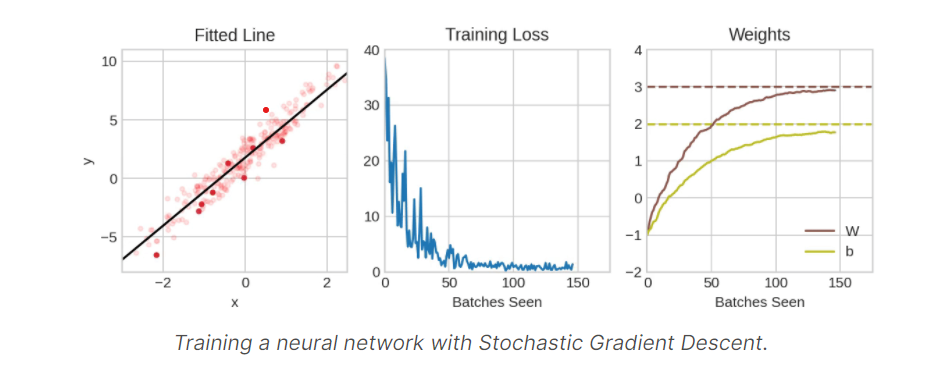

Кожна ітераційна вибірка навчальних даних називається мінібатч (або часто просто "батч" **batch**), тоді як повний цикл навчальних даних називається "епохою" **epoch**. Кількість епох, які ви тренуєте -- це те, скільки разів мережа проганятиме кожен набір даних навчання.

**Швидкість навчання та розмір батчу**

Швидкість навчання та розмір батчів - це два параметри, які найбільше впливають на те, як проходить навчання SGD (Stochastic Gradient Descent). Їх взаємодія часто буває філігранна, і правильний підбір цих параметрів не завжди очевидний.

На щастя, для більшості робіт не потрібно буде проводити детальний пошук гіперпараметрів, щоб отримати задовільні результати. `Adam` - це алгоритм SGD, який має адаптивну швидкість навчання, що робить його придатним для більшості проблем без будь-якої настройки параметрів (у певному сенсі це "**самонастроювання**"). **`Adam`** - чудовий оптимізатор загального призначення.

(40 хв)## **Практика**

Лінк до датасету з оцінками якості червоних вин -- https://drive.google.com/file/d/15XBGFVEufuMYJKRIBysUIp8CAMSk7qKm/view?usp=sharing

*Функція втрат та оптимізатор*

In [ ]:
model.compile(
    optimizer="adam",
    loss="mae",
)

Зверніть увагу, що ми можемо вказати втрати та оптимізатор *рядком*. 

Ви також можете отримати доступ до них безпосередньо через API Keras - якщо ви, наприклад, хочете налаштувати параметри, - але для нас за замовчуванням будуть працювати нормально.

**Звідки назва?**

> Градієнт - це вектор, який повідомляє нам, у якому напрямку повинні змінюватися ваги. Точніше, він розповідає нам, як змінити ваги, щоб швидше змінити втрати. Ми називаємо процес ***градієнтним спуском***, оскільки він використовує градієнт, щоб опустити криву втрат до мінімуму.





**Аналіз датасету**

Тепер ми знаємо все, що нам потрібно, щоб розпочати навчання моделям глибокого навчання. Тож давайте побачимо це в дії! Ми використовуватимемо набір даних*** Red Wine Quality.***

Цей набір даних складається з фізіохімічних вимірювань близько 1600 португальських червоних вин. Також включено рейтинг якості кожного вина із сліпих тестів смаку. Наскільки добре ми можемо передбачити сприйману якість вина за цими вимірами?

Ми помістили всю підготовку даних до наступної комірки. Наразі ви можете зауважити, що ми змінили масштаб багатьох параметрів, щоб вони знаходился в інтервалі **[0,1]**. Як ми обговоримо далі, нейронні мережі, як правило, мають найкращі показники, коли їх вхідні дані мають стандартизований масштаб.

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv("/content/drive/MyDrive/winequality-red.csv") #тут вказуємо шлях до датасету на вашому диску

# ділимо дані на навчальні та перевірочні
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Масштабуємо дo [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# розділимо параметри та цілі прогнозування
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Дослідимо розмір даних:

In [ ]:
print(X_train.shape)

(1119, 11)


Бачимо, що дані містять 11 колонок. Помістимо це число у `input_shape`

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Тепер ми готові розпочати навчання! Ми дали команду для `Keras` одночасно подавати оптимізатору 256 рядків навчальних даних (`batch_size`) і робити це 10 разів (`epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 65ms/step - loss: 0.2823 - val_loss: 0.1304
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1388 - val_loss: 0.1213
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1232 - val_loss: 0.1146
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1144 - val_loss: 0.1076
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1121 - val_loss: 0.1117
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1088 - val_loss: 0.1037
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1056 - val_loss: 0.1027
Epoch 8/10
5/5 [==============================] - 0s 24ms/step - loss: 0.1041 - val_loss: 0.1079
Epoch 9/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1045 - val_loss: 0.1020
Epoch 10/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1033 - val_loss: 0.1026


Часто кращий спосіб візуалізувати втрати - це побудувати їхній графік.

In [ ]:
import pandas as pd

# конвертуй історію навчання моделі у датафрейм
history_df = pd.DataFrame(history.history)
# застосуй класичну функцію Pandas
history_df['loss'].plot();

Зверніть увагу, як знижуються втрати з плином епох. Коли крива втрат стає такою горизонтальною, це означає, що модель вивчила все, що може, і не має більше причин продовжувати навчання.

##Урок 14: Переоснащення і недооснащення (overfitting and underfitting) в контексті нейронних мереж

(40 хв)**Інтерпретуючи криві навчання**

Можна вважати, що інформація у навчальних даних є двох видів: **сигнальна** та **шумова**:

**Сигнал** - це частина, яка узагальнює; яка може допомогти нашій моделі робити точніші прогнози на основі нових даних. **Шум** - це всі випадкові, неінформативні закономірності, які можуть не допомогти моделі робити влучні прогнози. Шум - це частина, яка може здаватися корисною, але насправді ні.

Ми тренуємо модель, вибираючи ваги або параметри, які мінімізують втрати на тренувальному наборі. Ти, однак, можеш знати, що для точної оцінки ефективності моделі нам потрібно протестувати її на перевірочному наборі даних: **даних перевірки**. 

Коли ми тренуємо модель, ми будували графік втрат на епоху за епохою на тренувальних даних (*training*). Тепер до цього ми також додамо графік даних перевірки (*validation*). Щоб ефективно тренувати моделі глибокого навчання, нам потрібно вміти їх інтерпретувати.

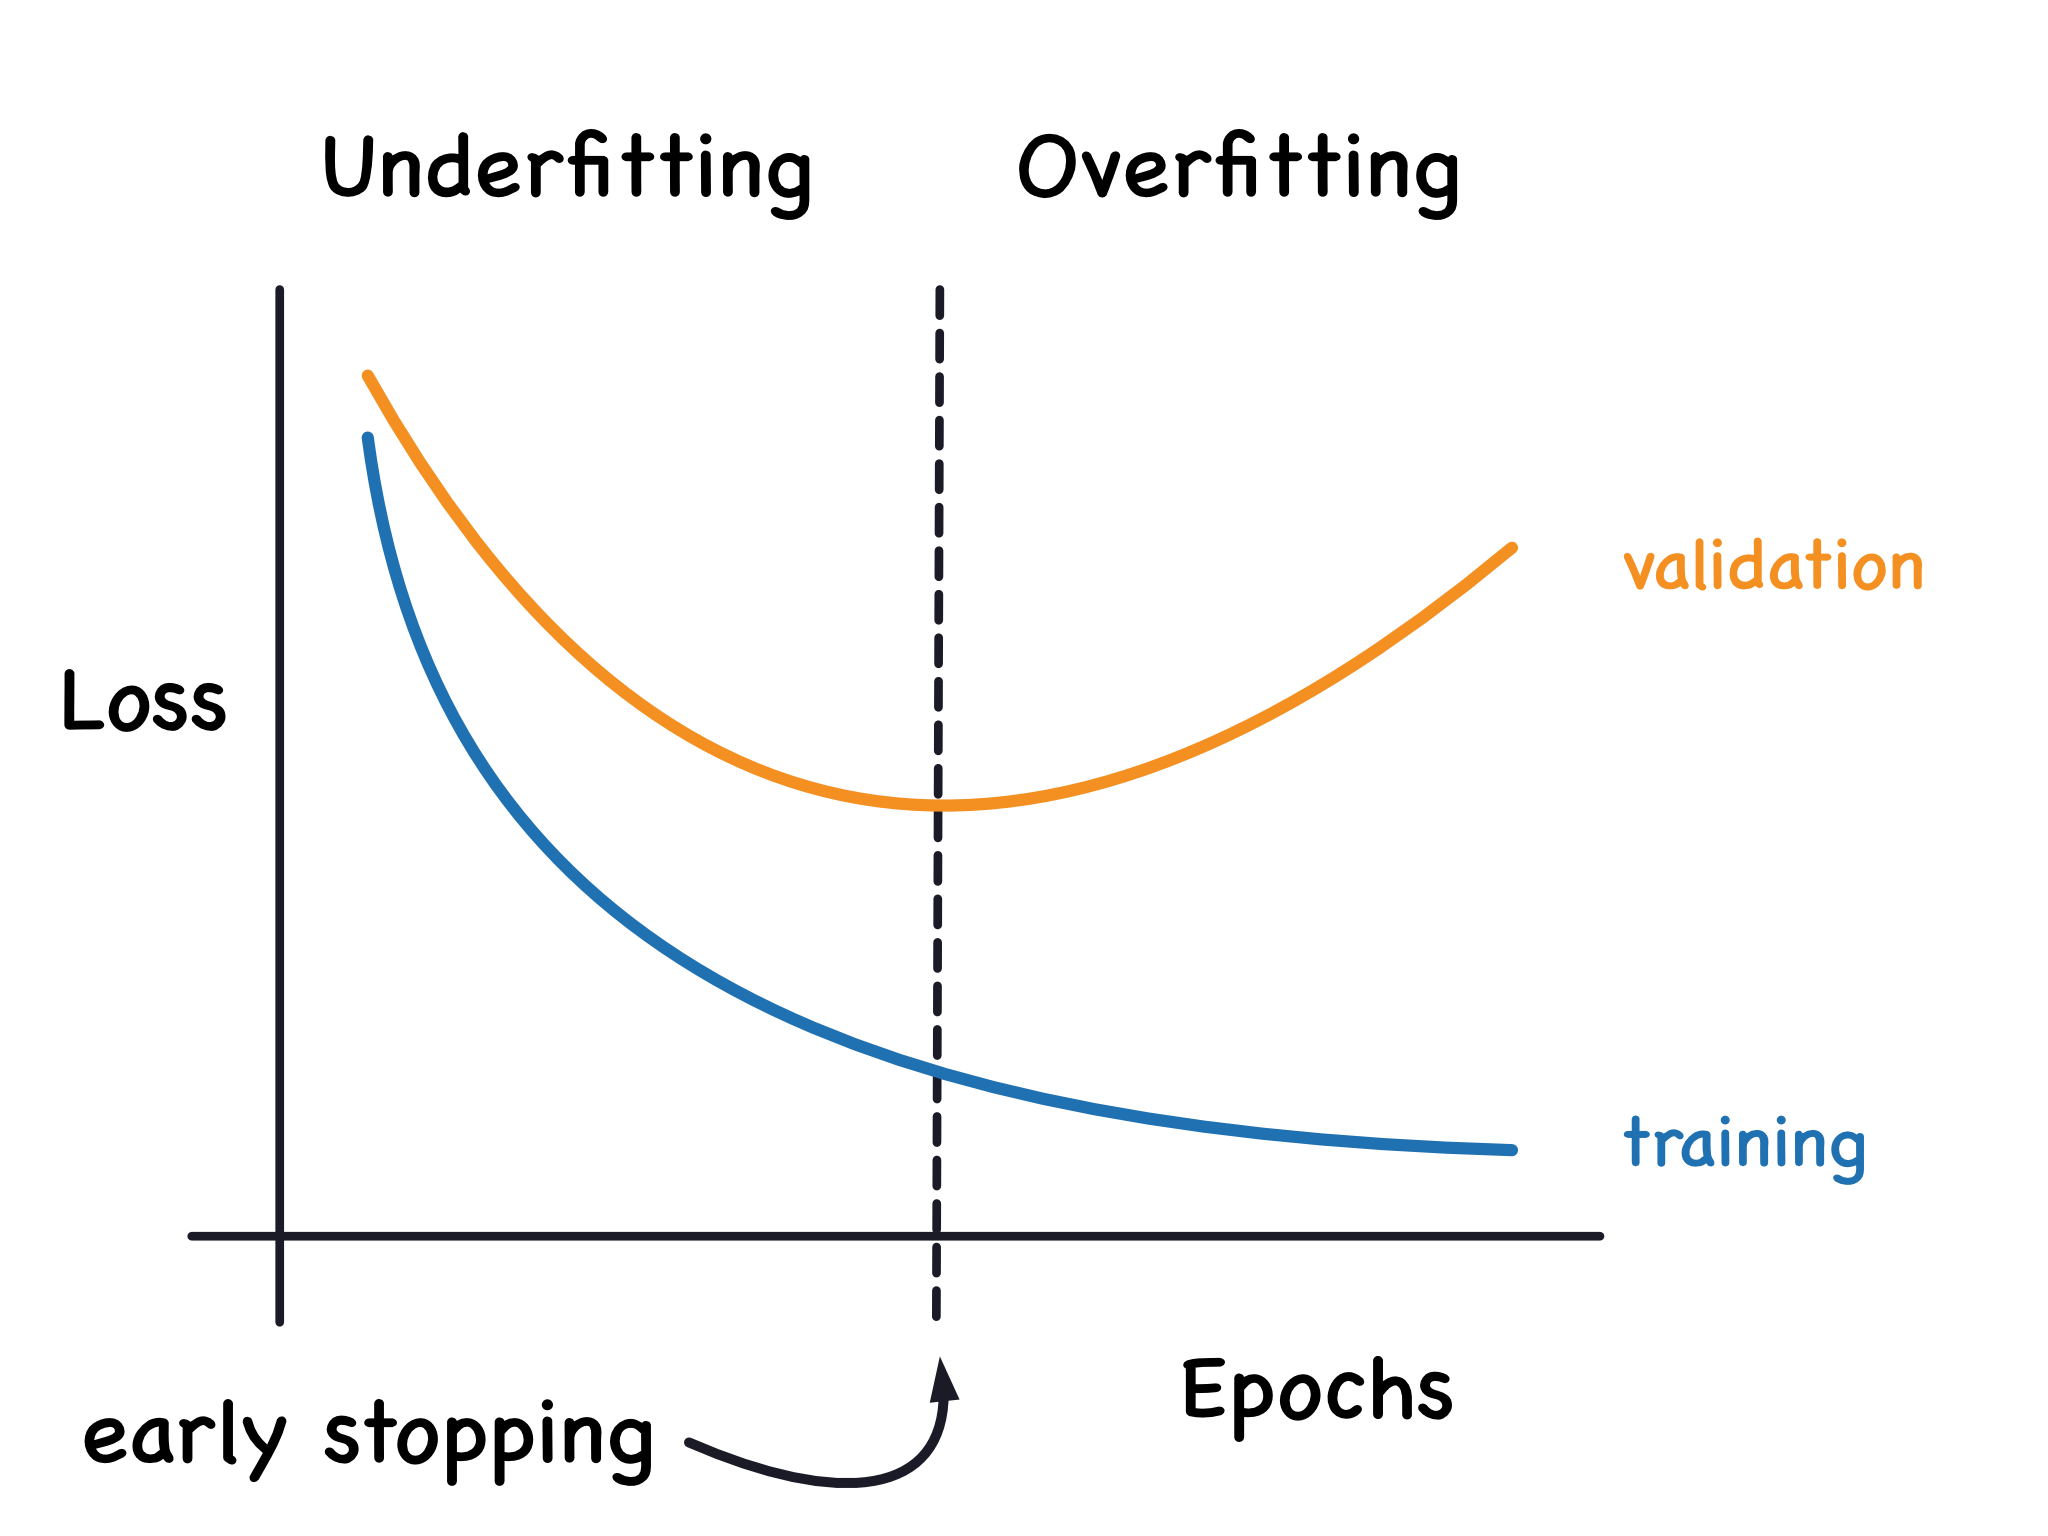

Втрати для тренувань зменшуються **або** тоді, коли модель засвоїть сигнал, **або** коли вона вивчить шум. Але втрати під час *перевірки* зменшаться лише тоді, коли модель **засвоїть** сигнал. (Який би шум не вивчала модель з навчального набору, це не допоможе будувати прогнози на нових даних.) Отже, коли модель засвоює сигнал, обидві криві падають, але коли вона фіксує здебільшого шум, між кривими створюється розрив. Розмір розриву говорить вам, скільки шуму вивчила модель.

В ідеалі ми хотіли б створити моделі, які вивчають весь сигнал і жоден шум. Цього практично ніколи не станеться. Натомість ми немов торгуємось з комп'ютером: поки торгівля йде на нашу користь, втрати від перевірки продовжуватимуть зменшуватися. Однак через певний момент торгівля може обернутися проти нас: втрати перевищують вигоду, і втрати від перевірки починають зростати.

Коли модель занадто охоче навчається, втрати під час перевірки можуть почати перебільшувати ті, ніж що під час навчання. Щоб запобігти цьому, ми можемо просто **припинити навчання**, коли здається, що втрата перевірки більше не зменшується. Переривання тренування таким чином називається ранньою зупинкою (**early stopping**).

**Потужність моделі**

Потужність моделі стосується її розміру та складності зразків, які вона здатна вивчити. Для нейронних мереж це значною мірою визначатиметься тим, скільки нейронів вона має і як вони з’єднані між собою. Якщо виявляється, що у вашій мережі недостатньо даних, спробуйте збільшити її пропускну здатність.

Ви можете збільшити потужність мережі або зробивши її ширшою (більше блоків до існуючих шарів), або зробивши її глибшою (додавши більше шарів). Ширші мережі легше засвоюють лінійні співвідношення, тоді як більш глибокі мережі надають перевагу більш нелінійним. 

Що краще? Залежить лише від набору даних.

In [ ]:
#типова модель
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])


#ширша модель
wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

#глибша модель
deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

(40 хв)**ПРАКТИКА**

Додаємо ранню зупинку:

У `Keras` ми включаємо ранню зупинку в наші тренування через імпорт `callback`. `callback` - це просто функція, яку потрібно запускати щоразу, коли мережа тренується. Рання зупинка - це один із `callback`, який буде виконуватися після кожної епохи.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping #імпортимо callback

early_stopping = EarlyStopping(
    min_delta=0.001, # мінімальна зміна, яка буде вважатися як покращення точності
    patience=20, # скільки епох чекати після того, як модель запідозрить переоснащення
    restore_best_weights=True,
)

Налаштовуємо датасет з минулого заняття:

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv("/content/drive/MyDrive/winequality-red.csv") #тут вказуємо шлях до датасету на вашому диску

# ділимо дані на навчальні та перевірочні
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Масштабуємо дo [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# розділимо параметри та цілі прогнозування
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Тепер давайте збільшимо потужність (вона ж ємність) мережі.

Ми запустимо досить велику мережу, покладаючись на ранню зупинку, щоб припинити навчання, як тільки втрата перевірки покаже ознаки переоснащення.

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Коли запускатимемо функцію `fit`, додамо ранню зупинку:

Найменша втрата перевірки: 0.09128808975219727


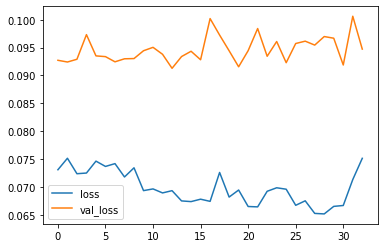

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500, #задаємо максимальну кількість епох
    callbacks=[early_stopping], # ось тут додаємо ранню зупинку
    verbose=0,  
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Найменша втрата перевірки: {}".format(history_df['val_loss'].min()))

Видно, що модель перестала тренуватися далеко від заданих 500 епох через early stopping!

##Урок 15: Batch нормалізація

(50 хв) На цьому уроці ми дізнаємося про два типи спеціальних шарів, які не містять власне нейронів, але додають певну функціональність, яка іноді може по-різному принести користь моделі. Обидва шари зазвичай використовуються в сучасних архітектурах.

**DROPOUT**

Перший з них - це "шар, що відпадає" (**dropout**), який може допомогти у виправленні переоснащення.

На останньому уроці ми говорили про те, як переоснащення спричинене оманливо правдоподібними закономірностями мережевого навчання при навчальних даних. Для розпізнавання цих помилкових закономірностей мережа часто покладається на дуже конкретні комбінації ваги, свого роду "змову" ваг. Будучи настільки конкретними, ці змови, як правило, крихкі: видаліть одну, і змова розвалюється.

Це ідея відмови від навчання. Щоб розірвати ці змови, ми випадковим чином викидаємо частину блоків на кожному етапі навчання, що ускладнює мережі вивчення цих помилкових зразків у навчальних даних. Натомість йому доводиться шукати більш загальні закономірності, чиї структури "ваг", як правило, є більш надійними.

Додавання **dropout**

У `Keras` коефіцієнт `rate` щодо droput визначає, який відсоток вхідних блоків потрібно відключити у момент часу. Помістіть шар "dropout" безпосередньо перед шаром, до якого потрібно застосувати dropout:

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # застосуйте 30% dropout до наступного шару
    layers.Dense(16),
    # ...
])
```


**BATCH нормалізація**

Наступний спеціальний шар, який ми розглянемо, виконує **batch нормалізацію** (або "*batchnorm*"), що може допомогти скорегувати повільне або нестабільне тренування.

Для нейронних мереж загалом є гарною ідеєю розмістити всі ваші дані в загальному масштабі, можливо, за допомогою чогось на кшталт `StandardScaler` або `MinMaxScaler` з бібліотеки `scikit-learn`. Причина полягає в тому, що стохастичний градієнт зміщуватиме ваги мережі пропорційно величині активації, яку виробляють дані. Особливості, які мають тенденцію активувати дуже різні розміри, можуть призвести до нестабільної поведінки в навчанні.

Тепер, якщо добре нормалізувати дані до того, як вони потраплять у мережу, можливо, нормалізація всередині мережі буде кращою!

Насправді, у нас є спеціальний тип шару, який може це зробити: batch нормалізація. Рівень нормалізації batch розглядає кожен batch в міру надходження, спочатку нормалізуючи партію із власним середнім значенням та стандартним відхиленням, а потім розміщуючи дані в новому масштабі з двома параметрами масштабування, що піддаються навчанню. 

> Batchnorm, по суті, виконує своєрідне скоординоване масштабування своїх входів.


Найчастіше batchnorm додають як допоміжний процес для оптимізації (хоча іноді він також може сприяти прогнозуванню ефективності). Моделі з Batchnorm, як правило, потребують менше епох для завершення навчання. Більше того, batchnorm також може виправити різні проблеми, які можуть призвести до того, що навчання "застрягне". Подумайте про те, щоб додати до своїх моделей нормалізацію партії, особливо якщо у вас виникають проблеми під час навчання.

**Додавання batchnorm**

Batchnorm можна використовувати практично в будь-якій точці мережі. Ви можете покласти його після шару або між ними


```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```



або



```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```



(30 хв) **ПРАКТИКА**

Продовжимо розробку моделі для датасету Red Wine. Тепер ми збільшимо об'єм моделі ще більше, але додамо dropout та batch нормалізацію, щоб прискорити оптимізацію. Цього разу ми також опустимо масштабування даних, щоб продемонструвати, як нормалізація партії може стабілізувати навчання.

In [ ]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd

red_wine = pd.read_csv("/content/drive/MyDrive/winequality-red.csv") #тут вказуємо шлях до датасету на вашому диску

# Створіть навчальні та перевірочні набори даних
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Розділіть параметри та цілі прогнозування
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

Під час додавання dropout вам може знадобитися збільшити кількість блоків у ваших щільних шарах.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Інші настройки -- без змін

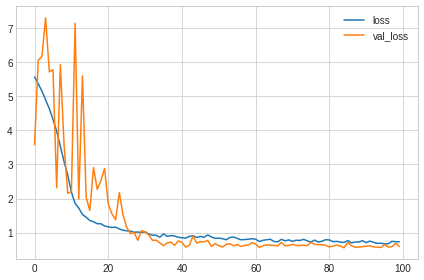

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Зазвичай ви отримуєте кращу продуктивність, якщо стандартизуєте свої дані перед тим, як використовувати їх для навчання. Однак те, що ми взагалі змогли використовувати необроблені дані, показує, наскільки ефективною може бути dropout та batch нормалізація на більш складних наборах даних.

##Урок 16: бінарна класифікація

(30 хв) **Вступ**

Класифікація набір параметрів в один із двох класів є типовим завданням машинного навчання. Можливо, ви плануєте передбачити, чи зможе клієнт здійснити покупку чи ні, чи була транзакція на кредитній картці шахрайською чи ні, чи сигнали глибокого космосу свідчать про нову планету чи ні, або медичні тести про захворювання є дійсними чи ні. Це все є проблеми бінарної класифікації.

У ваших вихідних даних класи можуть бути представлені такими рядками, як "`Так`" та "`Ні`", або "`Собака`" та "`Кішка`". Перш ніж використовувати ці дані, ми призначимо мітку класу: один клас відповідає `0` (по-людському: хиба), а інший - `1` (істина). Призначення числових міток приводить дані до форми, яку може опрацьовувати нейронна мережа.

**Точність та перехресна ентропія**

Точність є одним із багатьох показників, що використовуються для вимірювання успіху в класифікаційній задачі. Точність - це відношення правильних прогнозів до загальної кількості прогнозів: 

> `точність = кількість_правильних / загальних.`

Наприклад, модель, яка завжди передбачає правильно, мала б бал точності `1,0`. За інших рівних умов точність є розумною метрикою для використання, коли класи в наборі даних відбуваються приблизно з однаковою частотою.

Проблема точності (та більшості інших метрик класифікації) полягає в тому, що її не можна використовувати як функцію втрат. SGD потребує функції збитків, яка змінюється плавно, але точність, будучи співвідношенням метрик, змінює "стрибки". Отже, ми повинні вибрати замінник, який діятиме як функція збитків. Цей замінник є функцією *`перехресної ентропії.`*

Тепер нагадаємо, що функція втрат визначає якість мережі під час навчання. Завдяки регресії, нашою метою було мінімізувати відстань між очікуваним результатом та прогнозованим результатом. Ми вибрали `MAE` для вимірювання цієї відстані.

Для класифікації, ми хочемо замість цього, відстань між ймовірностями, і саме це забезпечує перехресна ентропія. Перехресна ентропія - це свого роду міра для відстані від одного розподілу ймовірностей до іншого.



> Перехресна ентропія зменшує неправильні прогнози ймовірності.



Ідея полягає в тому, що ми хочемо, щоб наша мережа передбачала правильний клас з імовірністю` 1.0`. Чим далі буде прогнозована ймовірність від `1,0`, тим більшими будуть перехресні ентропійні втрати.

Технічні причини, через які ми використовуємо перехресну ентропію, є делікатними, але основне, що слід зрозуміти з цього розділу, полягає лише в цьому: використовуйте перехресну ентропію для оцінки втрати класифікації; інші показники, які можуть вас турбувати (як точність), як правило, ідуть разом із ними.



**Створення ймовірностей за допомогою сигмовидної функції**

Для функцій перехресної ентропії та точності потрібні ймовірності як вхідні дані: тобто цифри від 0 до 1. Щоб перетворити реальні виходи, що створюються щільним шаром, у ймовірності, ми додаємо новий вид функції активації, сигмоїдної активації.

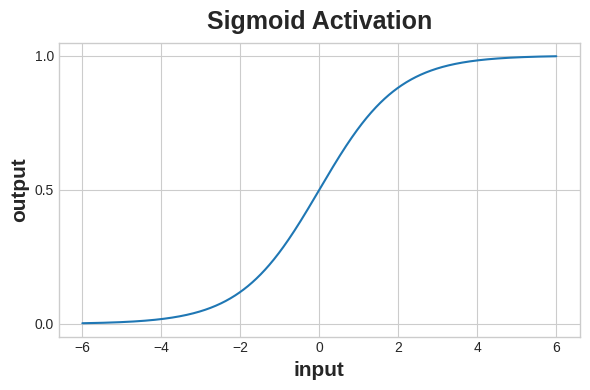

(40 хв) **ПРАКТИКА**

Для цього заняття ми будемо використовувати датасет **Ionosphere**.

Набір даних іоносфери містить характеристики, отримані від радіолокаційних сигналів, сфокусованих на іоносферному шарі атмосфери Землі. 

Наше завдання полягає в тому, щоб визначити, чи сигнал показує наявність якогось об'єкта, чи просто повітря.

Посилання на датасет: https://drive.google.com/file/d/1Cr7tapU_GUVBPpLjcfoGLvX4zCSS8ED8/view?usp=sharing

In [ ]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('../ion.csv', index_col=0) #пропишіть шлях
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # видалити пусту колонку 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

Ми визначимо нашу модель так само, як це було зроблено для завдань з регресіями, за одним винятком. У кінцевому шарі включимо активацію `sigmoid`, щоб модель формувала ймовірності класу.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

Додайте метрику перехресних ентропій (`cross-entropy`) та точності до моделі за допомогою її методу компіляції. Для двокласних проблем обов’язково використовуйте бінарні опції. Оптимізатор `adam` чудово підходить і для класифікації, тому ми будемо використовувати його. 

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Модель у цій конкретній задачі може зайняти чимало епох, щоб закінчити навчання, тому для зручності ми включимо `early_stopping`.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Розглянемо криві навчання, а також перевіримо найкращі значення втрат і точності, які ми отримали для набору перевірки:

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

#Блок 4: Обробка природньої мови

##Урок 17 Класифікація текстів

(40 хв)**Вступ**

Дані трапляються у різних формах: відмітки часу, показання датчиків, зображення, категорійні мітки та багато інших. Але текст все ще є одним з найціннішим типом даних для тих, хто вміє ним користуватися.

У цьому курсі з **обробки природної мови (NLP)** ви будете використовувати провідну бібліотеку NLP (`spaCy`) для виконання деяких найважливіших завдань у роботі з текстом.

Зрештою, ви зможете використовувати `spaCy` для:

1) Основної обробки тексту та класифікації

2) Побудови моделей машинного навчання з текстом

3) Представлення тексту за допомогою вбудовуванню слів (word embeddings), які числово вловлюють значення слів і документів


**Обробка Природньої Мови зі spaCy**

spaCy є провідною бібліотекою для NLP, і вона швидко стала однією з найпопулярніших фреймворків Python. Більшість людей вважають spaCy інтуїтивно зрозумілою, і вона має чудову документацію.

spaCy спирається на моделі, специфічні для мови, і мають різні розміри. Ви можете завантажити модель spaCy за допомогою `spacy.load`.

Наприклад, ось як ви завантажили б модель англійської мови.

In [ ]:
import spacy
nlp_eng = spacy.load('en_core_web_sm')

Для української:

In [ ]:
!pip install pymorphy2 #для української треба встановити ще зовнішню бібліотеку pymorphy2
import spacy
import pymorphy2

from spacy.lang.uk import Ukrainian 
nlp_ua = Ukrainian()

Тоді обробка тексту виглядає таким чином:

In [ ]:
doc_eng = nlp_eng("Tea is healthy and calming, don't you think?")
doc_ua = nlp_ua("Хочу чай, а ти?")

**ТОКЕНІЗАЦІЯ**

Токен - це одиниця тексту в документі, наприклад окремі слова та розділові знаки. SpaCy розбиває скорочення на кшталт "don't" на два смислові маркери: "do" та "n't".

In [ ]:
for token in doc_ua:
    print(token)

Хочу
чай
,
а
ти
?


**Леми**

Існує кілька типів попередньої обробки для покращення способу моделювання за допомогою слів. Перший - "***лематизація***". "Лема" слова - це його основна форма чи *інфінітив*. 

Наприклад, "хотіти" - це лема слова "хочу". Отже, коли ви лематизуєте слово "хочу", ви перетворюєте його на "хотіти".

Також поширеним є видалення стоп-слів. Стоп-слова - це слова, які часто зустрічаються в мові і не містять багато інформації. Англійські стоп-слова включають "the", "is", "and", "but", "not".

Маркер `spaCy token.lemma_` повертає лему, тоді як `token.is_stop` повертає значення True, якщо маркер є стопорним словом (а False - інакше).

In [ ]:
print(f"Token \t\tLemma \t\tStopword".format('Token', 'Lemma', 'Stopword'))
print("-"*40)
for token in doc_ua:
    print(f"{str(token)}\t\t{token.lemma_}\t\t{token.is_stop}")

Token 		Lemma 		Stopword
----------------------------------------
Хочу		хотіти		False
чай		чай		False
,		,		False
а		а		True
ти		ти		True
?		?		False


Чому важливі леми та ідентифікація стоп-слів?

Мовні дані мають багато *шуму*, змішаного з *інформативним* змістом. У реченні вище важливі слова - чай і хотіти. Видалення стоп-слів може допомогти прогностичній моделі зосередитися на відповідних словах. Подібне лемування допомагає шляхом об’єднання кількох форм одного слова в одну базову форму («хочу», «хотів», «хотітиме» зміниться на «хотіти»).

Однак лемматизація та відмова від ключових слів може призвести до того, що ваші моделі будуть працювати гірше. Тому ви повинні обережно розглядати цю попередню обробку як частину вашого процесу оптимізації гіперпараметрів.

**Пошук фрагментів**

Інше поширене завдання ОПМ - це зіставлення лексем або фраз з фрагментами тексту або цілих документів. Ви можете виконувати зіставлення шаблонів регулярними функціями, але можливості порівняння `spaCy`, як правило, простіші у використанні.

Щоб зіставити окремі маркери, ви створюєте об'єкт `Matcher`. Якщо ви хочете зіставити список термінів, використовувати `PhraseMatcher` простіше та ефективніше. Наприклад, якщо ви хочете знайти, де різні моделі смартфонів відображаються в якомусь тексті, ви можете створити шаблони для назв моделей, які вас цікавлять.

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab, attr='LOWER') 
#Збіг створюється з використанням словника вашої моделі.
#Тут ми використовуємо невелику англійську модель, яку ви завантажили раніше. 
#Встановлення attr = 'LOWER' буде відповідати фразам у нижньому регістрі тексту. 
#Це забезпечує збіг без урахування регістру.

Далі ви створюєте список термінів для відповідності в тексті. Зіставник фраз потребує шаблони як об’єкти документа.

In [ ]:
terms = ['Galaxy Note', 'iPhone 11', 'iPhone XS', 'Google Pixel']
patterns = [nlp(text) for text in terms]
matcher.add("TerminologyList", patterns)

In [ ]:
text_doc = nlp("Glowing review overall, and some really interesting side-by-side "
               "photography tests pitting the iPhone 11 Pro against the "
               "Galaxy Note 10 Plus and last year’s iPhone XS and Google Pixel 3.") 
matches = matcher(text_doc)
print(matches)

[(3766102292120407359, 17, 19), (3766102292120407359, 22, 24), (3766102292120407359, 30, 32), (3766102292120407359, 33, 35)]


Тут: збіги - це кортеж ідентифікатора відповідності (тобто слова у вигляді чисел) та позицій початку та кінця фрази.

Для того, щоб повернути слово назад:

In [ ]:
match_id, start, end = matches[0]
print(nlp.vocab.strings[match_id], text_doc[start:end])

TerminologyList iPhone 11



---



(50 хв) **Класифікація текстів**

Поширеним завданням у ОПМ є класифікація тексту. Це "Класифікація" у загальноприйнятому розумінні машинного навчання, і вона застосовується до тексту. Приклади включають виявлення спаму, аналіз настроїв та позначення запитів клієнтів.

На цьому занятті ви дізнаєтесь як за допомогою spaCy класифікувати текст.

Класифікатор виявлятиме спам-повідомлення, що є загальною функціональністю більшості поштових клієнтів. Ось огляд даних, які ви будете використовувати:

https://drive.google.com/file/d/1FUXrT0j5UXFK723SkV7BPM0PUinyIgOf/view?usp=sharing

In [ ]:
import pandas as pd

# Завантажєумо датасет 
# ham позначає НЕспамові повідомлення
spam = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1') #адаптуйте цей рядок під свій Гугл Диск
spam.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


**Мішок слів**

Моделі машинного навчання не навчаються з необроблених текстових даних. Замість цього вам потрібно перетворити текст у щось числове.

Найпростіше узагальнене представлення - це варіація ***(one-hot encoding)***. Ви представляєте кожен документ як вектор частот термінів для кожного терміна у словнику. Словник будується з усіх лексем (термінів) у корпусі (збірнику документів).

Як приклад візьмемо речення "Чай - це життя. Чай - це любов". і "Чай здоровий, заспокійливий і смачний". Тоді словниковий запас - "чай", "є", "життя", "кохання", "здоровий", "заспокійливий", "і", "смачний"} (ігноруючи розділові знаки).

Для кожного документа підрахуйте, скільки разів трапляється термін, і розмістіть його у відповідному елементі вектора. Перше речення двічі містить "чай", і це перше місце в нашому словниковому запасі, тому ми ставимо цифру 2 у першому елементі вектора.

Словники часто мають десятки тисяч термінів, тому ці вектори можуть бути дуже великими.

**Побудова моделі конвеєр «Мішок слів»**

Після того, як ваші документи знаходяться у мішку зі словами, ви можете використовувати ці вектори як вхідні дані для будь-якої моделі машинного навчання. `spaCy` обробляє пакет слів і створює просту лінійну модель для вас за допомогою класу `TextCategorizer`.

TextCategorizer - це об'єкт spaCy. Пайпи - це класи для обробки та перетворення токенів. Коли ви створюєте модель `spaCy` з `nlp = spacy.load ('en_core_web_sm')`, існують канали за замовчуванням, які виконують частину тегування мови, розпізнавання сутності та інші перетворення. Коли ви запускаєте текст через `doc = nlp ("Деякий текст тут")`, вихідні канали приєднуються до токенів у об'єкті doc. Лемми для `token.lemma_` виходять з одного з цих каналів.

Ви можете видалити або додати Пайпи до моделей. Тут ми будемо створювати порожню модель без будь-яких пайпів (крім токенізатора, оскільки всі моделі завжди мають токенізатор). Потім ми створимо канал `TextCategorizer` і додамо його до порожньої моделі.

In [ ]:
import spacy

# Create an empty model
nlp = spacy.blank("en")

# Create the TextCategorizer with exclusive classes and "bow" architecture
textcat = nlp.create_pipe(
              "textcat",
              config={
                "exclusive_classes": True,
                "architecture": "bow"})

# Add the TextCategorizer to the empty model
nlp.add_pipe(textcat)

Оскільки у цьому датасеті категорії завжди є або хамом, або спамом, ми встановили для `"exclusive_classes"` значення `True`. Ми також налаштували його за допомогою пакета слів ("bow"). spaCy також пропонує згорнуту архітектуру нейронної мережі, але вона складніша, ніж вам зараз потрібно.

Далі ми додамо мітки до моделі. Тут "ham" - це справжні повідомлення, "spam" - це спам-повідомлення

In [ ]:
textcat.add_label("ham")
textcat.add_label("spam")

1

Готуємо модель до тренування:

In [ ]:
train_texts = spam['v2'].values #відповідний стовбець у датасеті
train_labels = [{'cats': {'ham': label == 'ham',
                          'spam': label == 'spam'}} 
                for label in spam['v1']] #відповідний стовбець у датасеті

Тепер комбінуємо масиви у одинок масив

In [ ]:
train_data = list(zip(train_texts, train_labels))
train_data[:3]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  {'cats': {'ham': True, 'spam': False}}),
 ('Ok lar... Joking wif u oni...', {'cats': {'ham': True, 'spam': False}}),
 ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  {'cats': {'ham': False, 'spam': True}})]

Тренуємо модель: 



In [ ]:
import random
from spacy.util import minibatch

random.seed(1)
spacy.util.fix_random_seed(1)
optimizer = nlp.begin_training()

losses = {}
for epoch in range(10):
    random.shuffle(train_data)#перед початком нової епохи тасуємо датасет
    # створіть batch генератор з batch size = 8
    batches = minibatch(train_data, size=8)
    # Ітеруємо модель
    for batch in batches:
        # Кожен батч -- це list типу (text, label), тому для того,
        # щоб розділити text та labels: 
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd=optimizer, losses=losses)
    print(losses)

{'textcat': 1.0696611489197494}
{'textcat': 1.3880412149196673}
{'textcat': 1.5674024980979766}
{'textcat': 1.681955977383474}
{'textcat': 1.7561697764491715}
{'textcat': 1.8046211251626616}
{'textcat': 1.8381073211018668}
{'textcat': 1.8616576660981619}
{'textcat': 1.880188410344346}
{'textcat': 1.8942939823005773}


**Робимо передбачення**

In [ ]:
texts = ["Are you ready for the tea party????? It's gonna be wild",
         "URGENT Reply to this message for GUARANTEED FREE TEA"]
docs = [nlp.tokenizer(text) for text in texts]
    
# Use textcat to get the scores for each doc
textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

print(scores)

[[9.9996114e-01 3.8853370e-05]
 [1.4787153e-02 9.8521292e-01]]


Видно, що вихід дається у вигляді двох чисел, де перше число -- це ймовірність для ham, а друге -- для spam

Напишемо код, який виведе найбільш ймовірну категорію:

In [ ]:
predicted_labels = scores.argmax(axis=1)
print([textcat.labels[label] for label in predicted_labels])

['ham', 'spam']


##Урок 18 Вектори слів

(60 хв) На даний момент ви знаєте, що машинне навчання тексту вимагає, щоб ви спочатку представили текст у числовому вигляді. Поки що ви робили це за допомогою мішка слів. Але зазвичай можна краще вбудовувати слова.

Вбудовування слів (також звані векторами слів) представляють кожне слово чисельно таким чином, що вектор відповідає тому, як це слово використовується або що воно означає. Векторні кодування дізнаються, враховуючи контекст, у якому з'являються слова. Слова, що зустрічаються в подібних контекстах, матимуть подібні вектори. Наприклад, вектори для "леопарда", "лева" та "тигра" будуть близько один до одного, тоді як вони будуть далеко від "планети" та "замку".

Ще крутіші відносини між словами можна досліджувати за допомогою математичних операцій. Відняття векторів для "man" і "woman" поверне вектор на протилежний. Якщо додати це до вектора для "king", результат буде близьким до вектора для "queen".

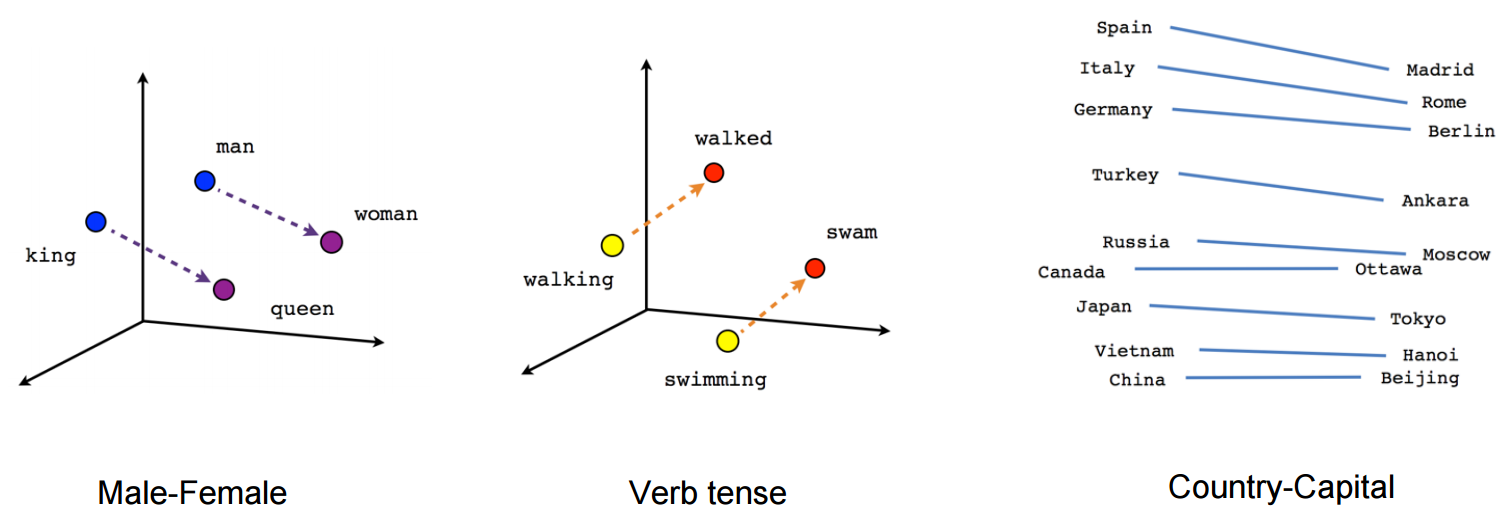

Ці вектори можна використовувати як функції для моделей машинного навчання. Вектори слів зазвичай покращують продуктивність ваших моделей над пакетом кодування слів. spaCy надає вбудовування, отримані з моделі під назвою `Word2Vec`. Ви можете отримати до них доступ, завантаживши велику мовну модель, наприклад `en_core_web_lg`. Тоді вони будуть доступні у маркерах з атрибута .`vector`.

In [ ]:
import numpy as np
import spacy

#Завантажуємо готові тексти
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Вимикаємо пайпи, бо вони нам зараз не треба
text = "These vectors can be used as features for machine learning models."
with nlp.disable_pipes():
    vectors = np.array([token.vector for token in  nlp(text)])

In [ ]:
vectors.shape

(12, 96)

Це 96-вимірні вектори, по одному вектору для кожного слова. Однак у нас є лише мітки на рівні документів, і наші моделі не зможуть використовувати вбудовування на рівні слова. Отже, вам потрібно векторне зображення для всього документа.

Існує багато способів об’єднати всі вектори слів в єдиний вектор документа, який ми можемо використовувати для навчання моделі. Простий і напрочуд ефективний підхід - це просто усереднення векторів для кожного слова в документі. Потім ви можете використовувати ці вектори документів для моделювання.

`spaCy` обчислює середній вектор документа, який можна отримати за допомогою `doc.vector`. Ось приклад завантаження спам-даних та перетворення їх у вектори документів.

In [ ]:
import pandas as pd

spam = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')

with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in spam.text])
    
doc_vectors.shape

FileNotFoundError: ignored

**Тренуємо модель для класифікації **

Крок 1: розділіть вхідні дані

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(doc_vectors, spam.label,
                                                    test_size=0.1, random_state=1)

Крок 2: Застосуйте support vector machines (SVMs) для тренування

In [ ]:
from sklearn.svm import LinearSVC

# встановіть dual=False. Воно не треба 
svc = LinearSVC(random_state=1, dual=False, max_iter=10000)
svc.fit(X_train, y_train)
print(f"Accuracy: {svc.score(X_test, y_test) * 100:.3f}%", )

**Подібність документів**

Документи зі схожим змістом зазвичай мають схожі вектори. Таким чином, ви можете знайти подібні документи, вимірявши подібність між векторами. Загальною метрикою для цього є подібність косинусу, яка вимірює кут між двома векторами, a і b.

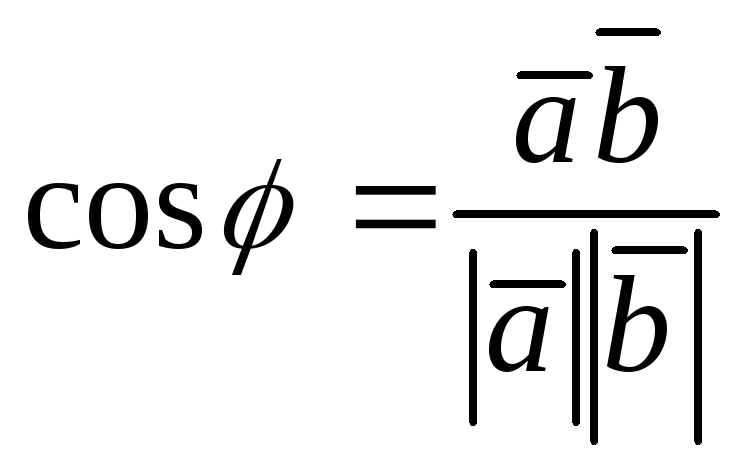

Це добуток векторів а і b, поділений на модулі кожного вектора. Величина косинуса може змінюватись між -1 і 1, що відповідає повній протилежності до ідеальної подібності відповідно. Для його розрахунку можна скористатися метрикою з scikit-learn або написати власну функцію.

In [ ]:
def cosine_similarity(a, b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))

In [ ]:
a = nlp("REPLY NOW FOR FREE TEA").vector
b = nlp("According to legend, Emperor Shen Nung discovered tea when leaves from a wild tree blew into his pot of boiling water.").vector
cosine_similarity(a, b)